In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import librosa
import librosa.display
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns
import IPython
import tensorflow.keras.layers as L
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder,StandardScaler
import re
import itertools
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import os
import zipfile


In [2]:
!kaggle datasets download -d uwrfkaggler/ravdess-emotional-speech-audio


Dataset URL: https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-speech-audio
License(s): CC-BY-NC-SA-4.0
ravdess-emotional-speech-audio.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:


# Specify the filename of the downloaded dataset
filename = 'ravdess-emotional-speech-audio.zip'  # The zip file name
extract_path = 'extracted_ravdess'  # Path to extract the files

# Create a directory to extract the files
os.makedirs(extract_path, exist_ok=True)


with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


print(os.listdir(extract_path))


['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05', 'Actor_06', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_10', 'Actor_11', 'Actor_12', 'Actor_13', 'Actor_14', 'Actor_15', 'Actor_16', 'Actor_17', 'Actor_18', 'Actor_19', 'Actor_20', 'Actor_21', 'Actor_22', 'Actor_23', 'Actor_24', 'audio_speech_actors_01-24']


In [4]:



data = []


for directory in os.listdir(extract_path):
    full_directory_path = os.path.join(extract_path, directory)
    if os.path.isdir(full_directory_path):
        for file in os.listdir(full_directory_path):
            if file.endswith('.wav'):  
                emotion = file.split('-')[2]  
                data.append([emotion, os.path.join(full_directory_path, file)])


ravdess_df = pd.DataFrame(data, columns=['Emotion', 'File_Path'])


print(ravdess_df.head())


  Emotion                                          File_Path
0      01  extracted_ravdess\Actor_01\03-01-01-01-01-01-0...
1      01  extracted_ravdess\Actor_01\03-01-01-01-01-02-0...
2      01  extracted_ravdess\Actor_01\03-01-01-01-02-01-0...
3      01  extracted_ravdess\Actor_01\03-01-01-01-02-02-0...
4      02  extracted_ravdess\Actor_01\03-01-02-01-01-01-0...


In [5]:



filename = 'ravdess-emotional-speech-audio.zip'  
extract_path = 'extracted_ravdess'
os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


Ravdess_Path = extract_path  


ravdess = []
for directory in os.listdir(Ravdess_Path):
    full_directory_path = os.path.join(Ravdess_Path, directory)
    if os.path.isdir(full_directory_path):
        actors = os.listdir(full_directory_path)
        for wav in actors:
            if wav.endswith('.wav'):
                emotion = wav.partition('.wav')[0].split('-')  
                ravdess.append([emotion[2], os.path.join(full_directory_path, wav)])


ravdess_df = pd.DataFrame(ravdess, columns=['Emotion', 'File_Path'])
print(ravdess_df.head())


  Emotion                                          File_Path
0      01  extracted_ravdess\Actor_01\03-01-01-01-01-01-0...
1      01  extracted_ravdess\Actor_01\03-01-01-01-01-02-0...
2      01  extracted_ravdess\Actor_01\03-01-01-01-02-01-0...
3      01  extracted_ravdess\Actor_01\03-01-01-01-02-02-0...
4      02  extracted_ravdess\Actor_01\03-01-02-01-01-01-0...


In [6]:
ravdess_df['Emotion'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08'], dtype=object)

In [7]:
ravdess_df

Emotion                                          File_Path
0         01  extracted_ravdess\Actor_01\03-01-01-01-01-01-0...
1         01  extracted_ravdess\Actor_01\03-01-01-01-01-02-0...
2         01  extracted_ravdess\Actor_01\03-01-01-01-02-01-0...
3         01  extracted_ravdess\Actor_01\03-01-01-01-02-02-0...
4         02  extracted_ravdess\Actor_01\03-01-02-01-01-01-0...
...      ...                                                ...
1435      08  extracted_ravdess\Actor_24\03-01-08-01-02-02-2...
1436      08  extracted_ravdess\Actor_24\03-01-08-02-01-01-2...
1437      08  extracted_ravdess\Actor_24\03-01-08-02-01-02-2...
1438      08  extracted_ravdess\Actor_24\03-01-08-02-02-01-2...
1439      08  extracted_ravdess\Actor_24\03-01-08-02-02-02-2...

[1440 rows x 2 columns]

In [8]:
# Check unique emotions in the dataset
unique_emotions = ravdess_df['Emotion'].unique()
print(unique_emotions)


['01' '02' '03' '04' '05' '06' '07' '08']


In [9]:
ravdess_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
ravdess_df['Emotion'].replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'},inplace=True)


In [10]:
unique_emotions = ravdess_df['Emotion'].unique()
print(unique_emotions)

['01' '02' '03' '04' '05' '06' '07' '08']


In [11]:

emotion_mapping = {
    '01': 'neutral',
    '02': 'calm',
    '03': 'happy',
    '04': 'sad',
    '05': 'angry',
    '06': 'fear',
    '07': 'disgust',
    '08': 'surprise'
}



# Replace numerical labels with actual emotion names
ravdess_df['Emotion'] = ravdess_df['Emotion'].replace(emotion_mapping)


unique_emotions = ravdess_df['Emotion'].unique()
print(unique_emotions)


['neutral' 'calm' 'happy' 'sad' 'angry' 'fear' 'disgust' 'surprise']


In [12]:
# Count occurrences of each emotion
emotion_counts = ravdess_df['Emotion'].value_counts()
print(emotion_counts)


Emotion
calm        192
happy       192
sad         192
angry       192
fear        192
disgust     192
surprise    192
neutral      96
Name: count, dtype: int64


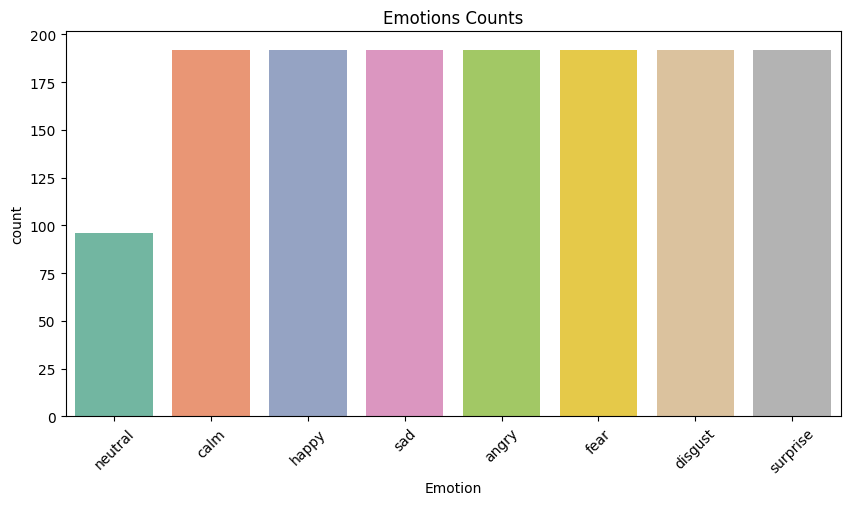

In [13]:
plt.figure(figsize=(10,5))
plt.title('Emotions Counts')
emotions=sns.countplot(x='Emotion',data=ravdess_df,palette='Set2')
emotions.set_xticklabels(emotions.get_xticklabels(),rotation=45)
plt.show()


In [14]:
emotion_names=ravdess_df['Emotion'].unique()

In [15]:
color_palette = {
    'neutral': 'blue',
    'calm': 'green',
    'happy': 'yellow',
    'sad': 'purple',
    'angry': 'red',
    'fear': 'orange',
    'disgust': 'pink',
    'surprise': 'cyan'
}

In [16]:
def plot_waveform(file_path, emotion,color):
    # Load audio file
    y, sr = librosa.load(file_path, sr=None)
    
# Create a waveform plot
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(y, sr=sr, alpha=0.5)
    plt.title(f'Waveform - Emotion: {emotion}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.show()

def plot_spectrogram(file_path, emotion):
  
    y, sr = librosa.load(file_path, sr=None)
    
    # spectrogram
    plt.figure(figsize=(10, 4))
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log', cmap='coolwarm')
    plt.title(f'Spectrogram - Emotion: {emotion}')
    plt.colorbar(format='%+2.0f dB')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.show()


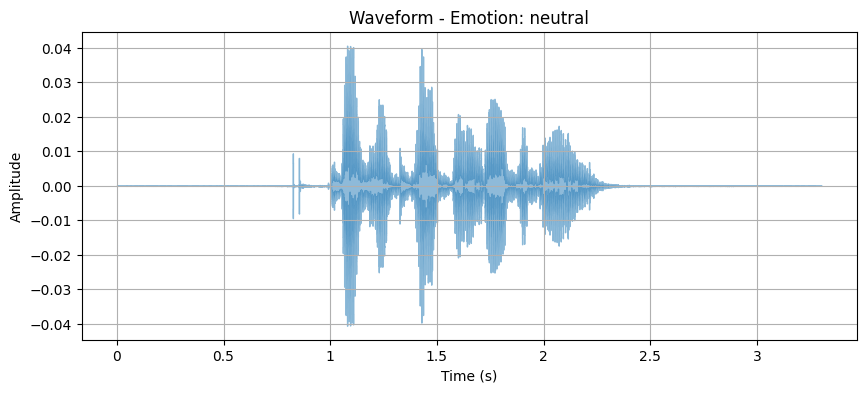

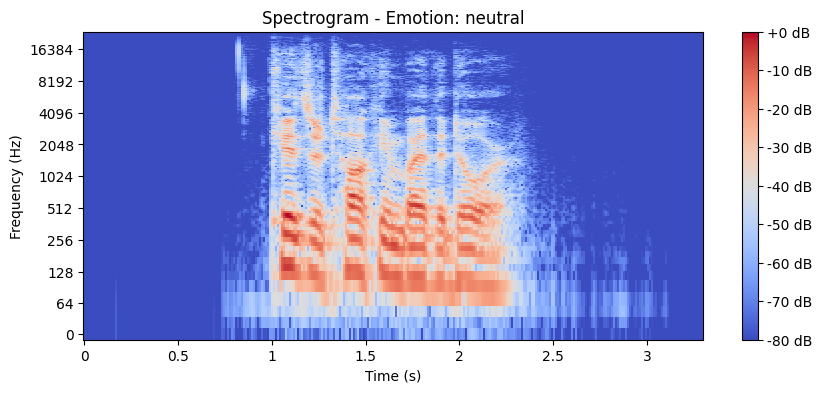

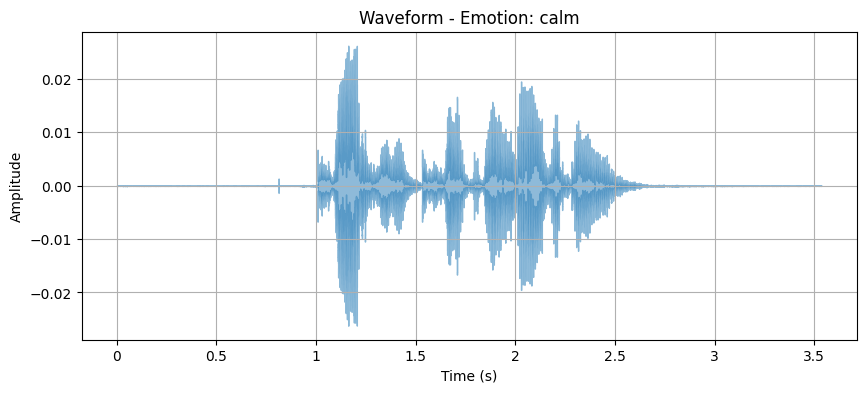

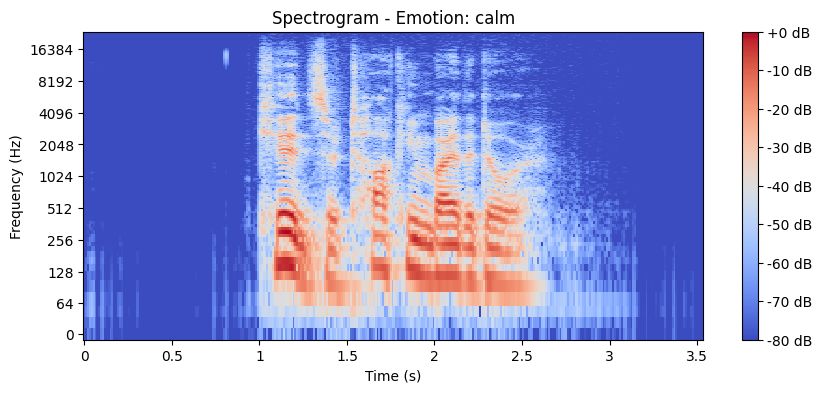

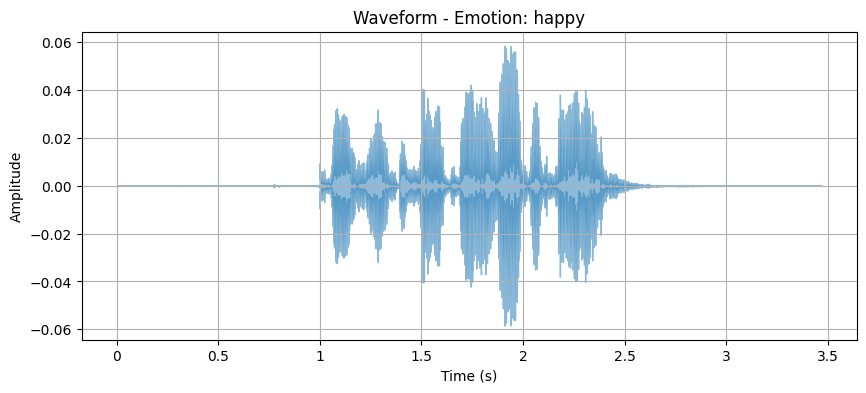

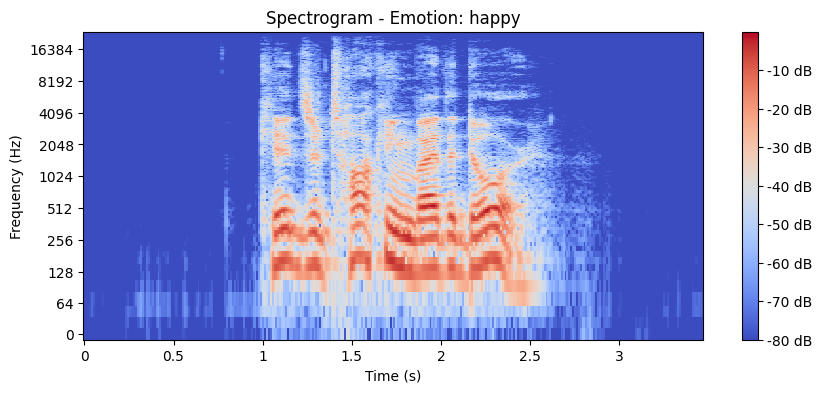

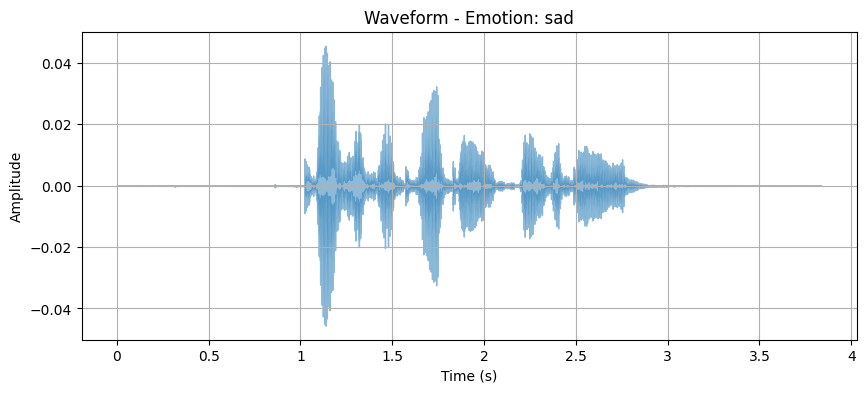

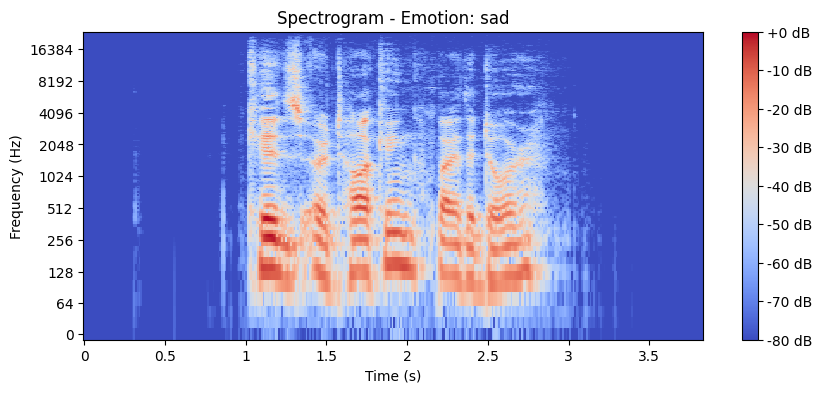

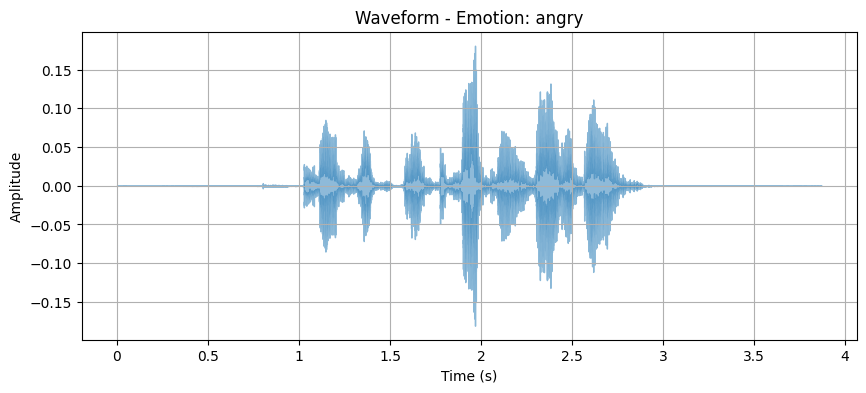

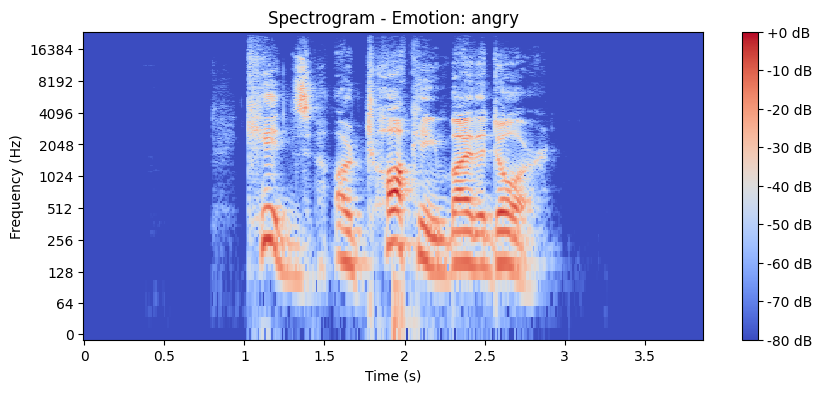

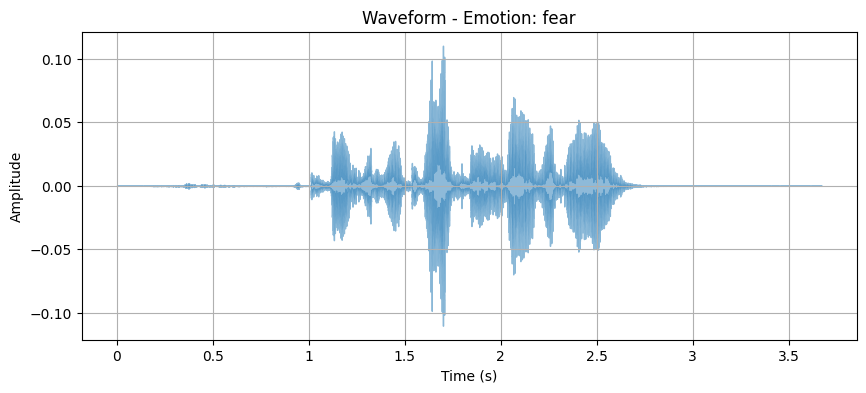

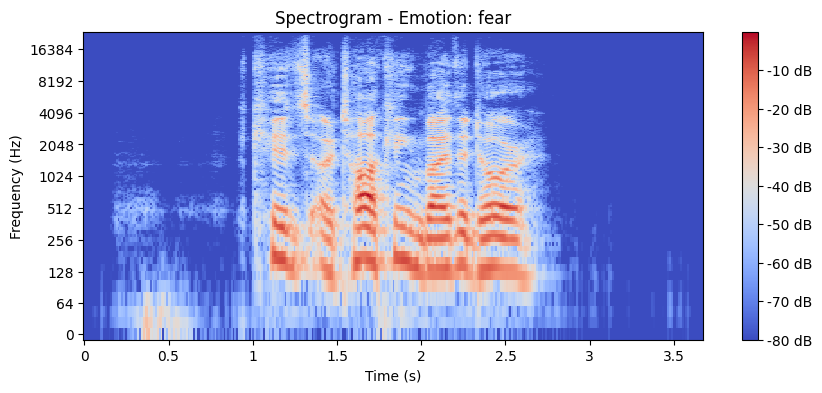

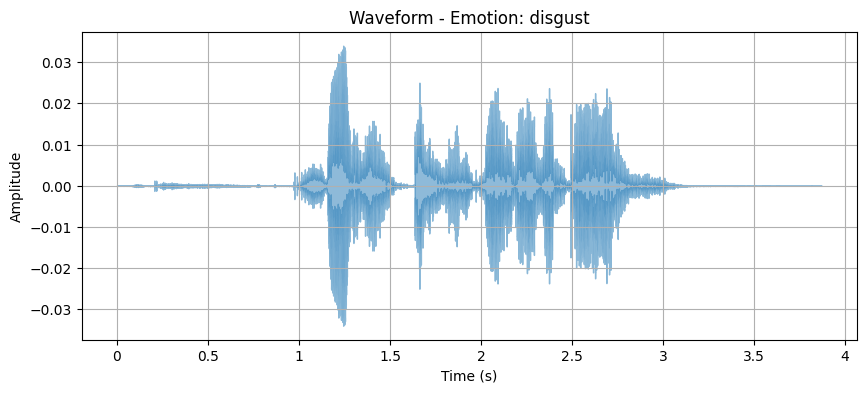

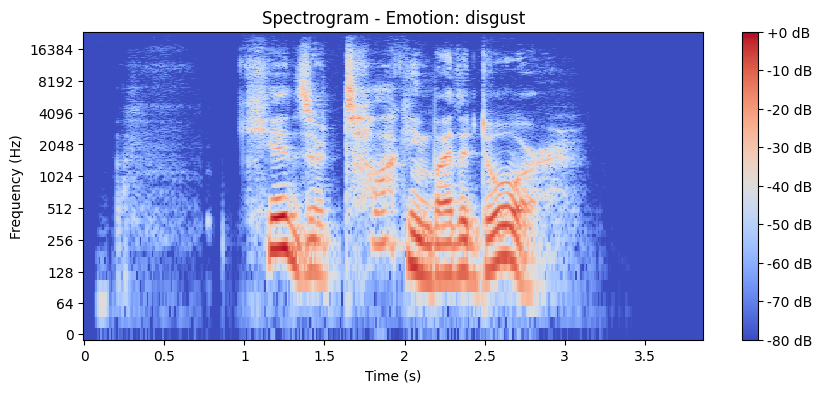

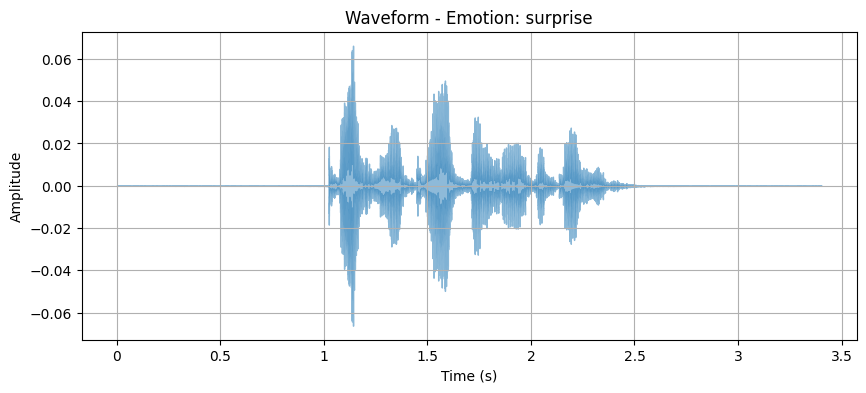

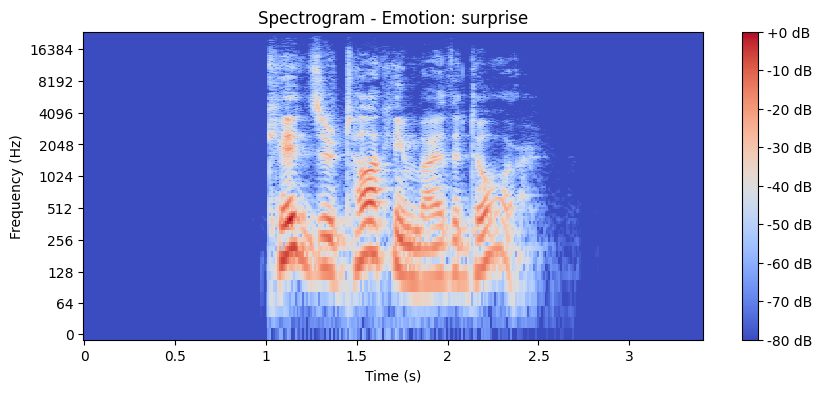

In [17]:

unique_emotions = ravdess_df['Emotion'].unique()


for emotion in unique_emotions:
    
    file_path = ravdess_df[ravdess_df['Emotion'] == emotion]['File_Path'].iloc[0]
    
   
    color = color_palette[emotion]
    
    
    plot_waveform(file_path, emotion, color)
    
    
    plot_spectrogram(file_path, emotion)


In [18]:
from IPython.display import Audio

In [19]:
import os

print("Current Working Directory:", os.getcwd())


Current Working Directory: C:\Users\aadit\OneDrive\Desktop\SER_CNN


In [20]:
import zipfile
import os


zip_file_path = r'C:\Users\aadit\OneDrive\Desktop\SER_CNN\ravdess-emotional-speech-audio.zip'  # Update this to your actual path
extract_path = r'C:\Users\aadit\OneDrive\Desktop\SER_CNN\ravdess_extracted/'  # Specify a path for extraction


os.makedirs(extract_path, exist_ok=True)


with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Files extracted to: {extract_path}")




Files extracted to: C:\Users\aadit\OneDrive\Desktop\SER_CNN\ravdess_extracted/


In [21]:
import os

# Update this path to the actual location where you extracted the dataset
extract_path = r'C:\Users\aadit\OneDrive\Desktop\SER_CNN\ravdess_extracted/'  # Update this to your extraction path

# List audio files in the extracted directory
audio_files = os.listdir(extract_path)
print("Audio files in the directory:")
print(audio_files)


Audio files in the directory:
['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05', 'Actor_06', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_10', 'Actor_11', 'Actor_12', 'Actor_13', 'Actor_14', 'Actor_15', 'Actor_16', 'Actor_17', 'Actor_18', 'Actor_19', 'Actor_20', 'Actor_21', 'Actor_22', 'Actor_23', 'Actor_24', 'audio_speech_actors_01-24']


In [22]:
import os

extract_path = r'C:\Users\aadit\OneDrive\Desktop\SER_CNN\ravdess_extracted/'  


extracted_files = os.listdir(extract_path)
print("Extracted files:")
print(extracted_files)


Extracted files:
['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05', 'Actor_06', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_10', 'Actor_11', 'Actor_12', 'Actor_13', 'Actor_14', 'Actor_15', 'Actor_16', 'Actor_17', 'Actor_18', 'Actor_19', 'Actor_20', 'Actor_21', 'Actor_22', 'Actor_23', 'Actor_24', 'audio_speech_actors_01-24']


In [23]:
import librosa
from IPython.display import Audio, display

# Update this to the path where your .wav files are located
audio_files = [file for file in extracted_files if file.endswith('.wav')]

if audio_files:  # Check if there are audio files
    filename = audio_files[0]  # Use the first audio file as an example
    file_path = os.path.join(extract_path, filename)

    # Load the audio file
    try:
        y, sr = librosa.load(file_path, sr=None)
        print(f"Loaded audio: {filename}\n- Duration: {librosa.get_duration(y=y, sr=sr)} seconds\n- Sample Rate: {sr} Hz\n- Sample Shape: {y.shape}")
        display(Audio(file_path))  # Display the audio player
    except Exception as e:
        print(f"Error loading audio file: {e}")
else:
    print("No audio files found in the directory.")


No audio files found in the directory.


In [24]:
import os

# Path to the specific actor's directory
actor_directory = r'C:\Users\aadit\OneDrive\Desktop\SER_CNN\ravdess_extracted\Actor_01'

# List all audio files in the Actor_01 directory
audio_files = [file for file in os.listdir(actor_directory) if file.endswith('.wav')]
print("Audio files in Actor_01:")
print(audio_files)


Audio files in Actor_01:
['03-01-01-01-01-01-01.wav', '03-01-01-01-01-02-01.wav', '03-01-01-01-02-01-01.wav', '03-01-01-01-02-02-01.wav', '03-01-02-01-01-01-01.wav', '03-01-02-01-01-02-01.wav', '03-01-02-01-02-01-01.wav', '03-01-02-01-02-02-01.wav', '03-01-02-02-01-01-01.wav', '03-01-02-02-01-02-01.wav', '03-01-02-02-02-01-01.wav', '03-01-02-02-02-02-01.wav', '03-01-03-01-01-01-01.wav', '03-01-03-01-01-02-01.wav', '03-01-03-01-02-01-01.wav', '03-01-03-01-02-02-01.wav', '03-01-03-02-01-01-01.wav', '03-01-03-02-01-02-01.wav', '03-01-03-02-02-01-01.wav', '03-01-03-02-02-02-01.wav', '03-01-04-01-01-01-01.wav', '03-01-04-01-01-02-01.wav', '03-01-04-01-02-01-01.wav', '03-01-04-01-02-02-01.wav', '03-01-04-02-01-01-01.wav', '03-01-04-02-01-02-01.wav', '03-01-04-02-02-01-01.wav', '03-01-04-02-02-02-01.wav', '03-01-05-01-01-01-01.wav', '03-01-05-01-01-02-01.wav', '03-01-05-01-02-01-01.wav', '03-01-05-01-02-02-01.wav', '03-01-05-02-01-01-01.wav', '03-01-05-02-01-02-01.wav', '03-01-05-02-02-01-01.

In [25]:
import os
import random
import librosa
from IPython.display import Audio, display


base_directory = r'C:\Users\aadit\OneDrive\Desktop\SER_CNN\ravdess_extracted'

actor_dirs = [d for d in os.listdir(base_directory) if os.path.isdir(os.path.join(base_directory, d))]


if actor_dirs:
    
    random_actor = random.choice(actor_dirs)
    actor_path = os.path.join(base_directory, random_actor)

    audio_files = [file for file in os.listdir(actor_path) if file.endswith('.wav')]

    if audio_files:
        random_file = random.choice(audio_files)
        file_path = os.path.join(actor_path, random_file)

        try:
            y, sr = librosa.load(file_path, sr=None)
            print(f"Loaded audio from {random_actor}:\n- Filename: {random_file}\n- Duration: {librosa.get_duration(y=y, sr=sr)} seconds\n- Sample Rate: {sr} Hz\n- Sample Shape: {y.shape}")
            display(Audio(file_path))  # Display the audio player
        except Exception as e:
            print(f"Error loading audio file: {e}")
    else:
        print(f"No audio files found in {random_actor}.")
else:
    print("No actor directories found.")


Loaded audio from Actor_20:
- Filename: 03-01-04-02-01-02-20.wav
- Duration: 4.2375625 seconds
- Sample Rate: 48000 Hz
- Sample Shape: (203403,)


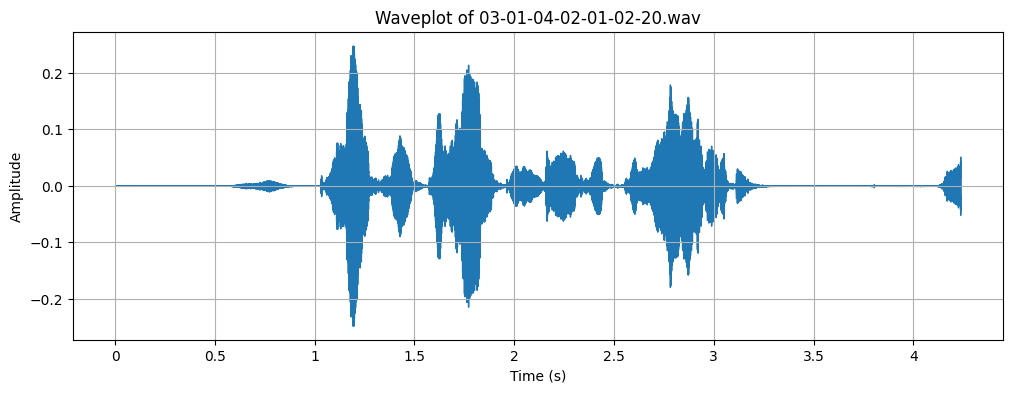

In [26]:
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title(f'Waveplot of {random_file}')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

In [27]:
import librosa
print(librosa.__version__)


0.10.2.post1


In [28]:
def add_noise(data,random=False,rate=0.035,threshold=0.075):
    if random:
        rate=np.random.random()*threshold
    noise=rate*np.random.uniform()*np.amax(data)
    augmented_data=data+noise*np.random.normal(size=data.shape[0])
    return augmented_data

def shifting(data,rate=1000):
    augmented_data=int(np.random.uniform(low=-5,high=5)*rate)
    augmented_data=np.roll(data,augmented_data)
    return augmented_data

def pitching(data,sr,pitch_factor=0.7,random=False):
    if random:
        pitch_factor=np.random.random() * pitch_factor
    return librosa.effects.pitch_shift(data,sr,pitch_factor)

def streching(data,rate=0.8):
    return librosa.effects.time_stretch(data,rate)

In [29]:
noisy_audio = add_noise(y, random=True)

            # Display the noisy audio player
print("Playing noisy audio:")
display(Audio(noisy_audio, rate=sr))  # Display the noisy audio player

Playing noisy audio:


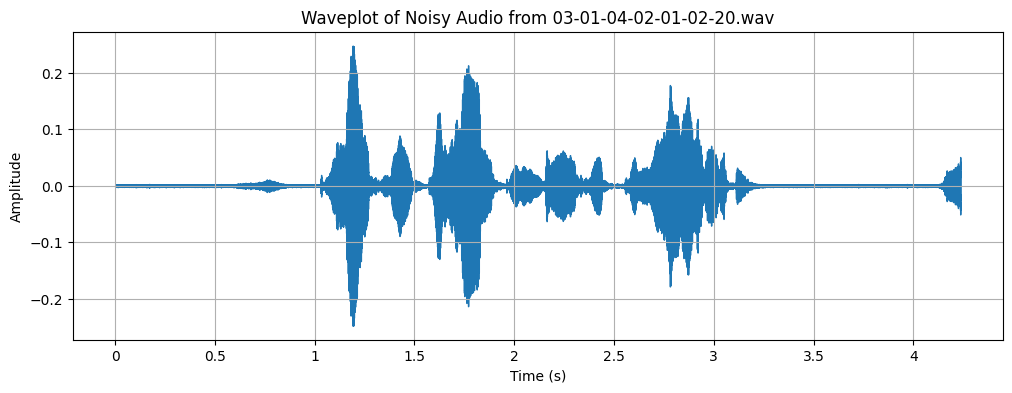

In [30]:
plt.figure(figsize=(12, 4))
librosa.display.waveshow(noisy_audio, sr=sr)
plt.title(f'Waveplot of Noisy Audio from {random_file}')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

In [31]:

def shift(y, sr, shift_max=0.2):
    """Shift the audio signal."""
    shift_samples = int(shift_max * sr)  
    return np.roll(y, shift_samples)

# Apply the shift function
shifted_audio = shift(y, sr)


print("Playing shifted audio:")
display(Audio(shifted_audio, rate=sr))


Playing shifted audio:


Text(22.472222222222214, 0.5, 'Amplitude')

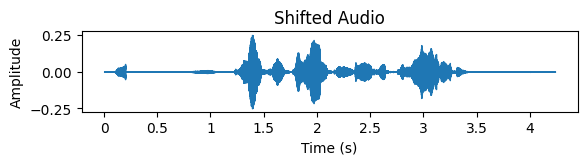

In [32]:
plt.subplot(4, 1, 2)
librosa.display.waveshow(shifted_audio, sr=sr)
plt.title('Shifted Audio')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')


In [33]:
def shift(data, sr, shift_max=0.2):
    """Shift the audio signal."""
    shift_samples = int(shift_max * sr)  # Convert to samples
    return np.roll(data, shift_samples)

In [34]:
print("Playing shifted audio:")
display(Audio(shifted_audio, rate=sr))

Playing shifted audio:


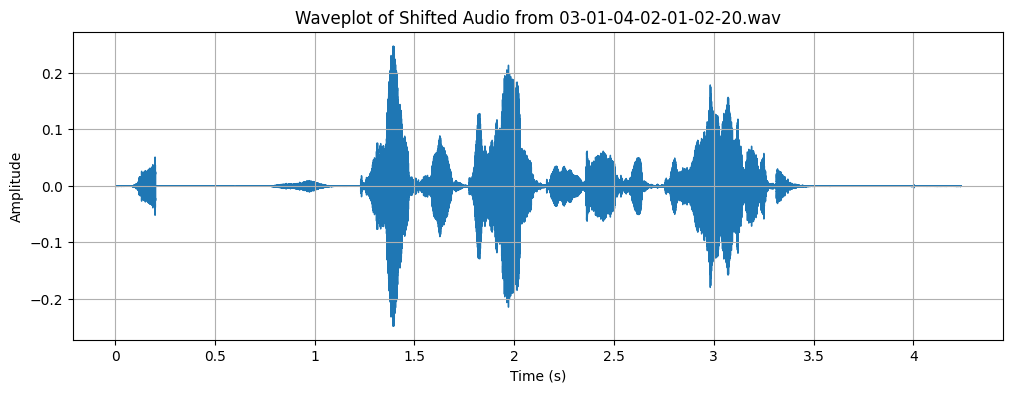

In [35]:
plt.figure(figsize=(12, 4))
librosa.display.waveshow(shifted_audio, sr=sr)
plt.title(f'Waveplot of Shifted Audio from {random_file}')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

In [36]:
def pitching(data, sr, pitch_factor=0.7, random=False):
    if random:
        pitch_factor = np.random.random() * pitch_factor
    return librosa.effects.pitch_shift(data, sr, n_steps=pitch_factor)

In [37]:


# Function to extract features from audio
def extract_features(y, sr):
    #  MFCCs
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    #  Spectral Centroid
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    # Chroma Features
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    
    return {
        'mfccs': mfccs,
        'spectral_centroid': spectral_centroid,
        'chroma_stft': chroma_stft
    }

def load_and_process_audio(base_directory):
    actor_dirs = [d for d in os.listdir(base_directory) if os.path.isdir(os.path.join(base_directory, d))]

    if actor_dirs:
        random_actor = random.choice(actor_dirs)
        actor_path = os.path.join(base_directory, random_actor)

        audio_files = [file for file in os.listdir(actor_path) if file.endswith('.wav')]

        if audio_files:
            random_file = random.choice(audio_files)
            file_path = os.path.join(actor_path, random_file)

            y, sr = librosa.load(file_path, sr=None)
            print(f"Loaded audio from {random_actor}:\n- Filename: {random_file}")

            return y, sr
    return None, None

# Example usage
if __name__ == "__main__":
  
    base_directory = r'C:\Users\aadit\OneDrive\Desktop\SER_CNN\ravdess_extracted'

    
    y, sr = load_and_process_audio(base_directory)

    if y is not None and sr is not None:
     
        noisy_audio = y + 0.005 * np.random.randn(len(y))

        stretched_audio = librosa.effects.time_stretch(noisy_audio, rate=1.1)

        shifted_audio = np.roll(noisy_audio, 1000)  # Shift by 1000 samples, adjust as needed

        features = {
            'original': extract_features(y, sr),
            'noisy': extract_features(noisy_audio, sr),
            'stretched': extract_features(stretched_audio, sr),
            'shifted': extract_features(shifted_audio, sr)
        }

        
        for variant, feature_set in features.items():
            print(f"\nExtracted Features for {variant} audio:")
            print(f"MFCCs: {feature_set['mfccs']}\n")
            print(f"Spectral Centroid: {feature_set['spectral_centroid']}\n")
            print(f"Chroma STFT: {feature_set['chroma_stft']}\n")
    else:
        print("No audio files found.")


Loaded audio from Actor_20:
- Filename: 03-01-06-02-02-01-20.wav

Extracted Features for original audio:
MFCCs: [[-5.3490192e+02 -5.3478308e+02 -5.3486255e+02 ... -5.3490192e+02
  -5.3490192e+02 -5.3490192e+02]
 [ 0.0000000e+00  1.6320658e-01  5.3915702e-02 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  1.4918303e-01  4.8958998e-02 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 ...
 [ 0.0000000e+00 -1.2154479e-01 -4.3073487e-02 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00 -1.4503795e-01 -5.0115004e-02 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00 -1.6026294e-01 -5.4094192e-02 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]]

Spectral Centroid: [[ 5391.14886679  5387.53351994  5926.57384796  7203.95256223
   8227.24116438  7872.06878511  6902.70002259  6360.2527254
   5547.87301521  5352.71650783  5332.67600298  4994.04660567
   5161.17280236  5374.98637107  5344.25064877  5462.39667756
   5735.83957408  592

In [38]:
def load_and_preprocess_audio(base_directory, segment_length=2.0, sr=22050):
    actor_dirs = [d for d in os.listdir(base_directory) if os.path.isdir(os.path.join(base_directory, d))]

    if actor_dirs:
        random_actor = random.choice(actor_dirs)
        actor_path = os.path.join(base_directory, random_actor)

        audio_files = [file for file in os.listdir(actor_path) if file.endswith('.wav')]

        if audio_files:
            random_file = random.choice(audio_files)
            file_path = os.path.join(actor_path, random_file)

            y, sr = librosa.load(file_path, sr=sr)
            print(f"Loaded audio from {random_actor}:\n- Filename: {random_file}")

            y = y / np.max(np.abs(y))  

            segment_samples = int(segment_length * sr)  
            segments = []
            for start in range(0, len(y), segment_samples):
                end = start + segment_samples
                segment = y[start:end]
                if len(segment) == segment_samples:  
                    segments.append(segment)

            return segments, sr
    return None, None


if __name__ == "__main__":
    base_directory = r'C:\Users\aadit\OneDrive\Desktop\SER_CNN\ravdess_extracted'

    segments, sr = load_and_preprocess_audio(base_directory)

    if segments is not None:
        print(f"Number of segments created: {len(segments)}")
    else:
        print("No audio files found.")

Loaded audio from Actor_06:
- Filename: 03-01-08-02-02-01-06.wav
Number of segments created: 1


In [39]:
import os
import random
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

def add_noise(data, random=False, rate=0.035, threshold=0.075):
    if random:
        rate = np.random.random() * threshold
    noise = rate * np.random.uniform() * np.amax(data)
    augmented_data = data + noise * np.random.normal(size=data.shape[0])
    return augmented_data

def custom_time_stretch(data, rate=1.1):
    """Stretch the audio signal in time."""
    return librosa.effects.time_stretch(data, rate=1.1)

# Function to shift the audio
def shifting(data, rate=1000):
    """Shift the audio signal."""
    augmented_data = int(np.random.uniform(low=-5, high=5) * rate)
    return np.roll(data, augmented_data)




#  extract features from audio
def extract_features(y, sr):
    #  MFCCs
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    #  Spectral Centroid
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    # Chroma Features
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    
    # dictionary
    return {
        'mfccs': mfccs,
        'spectral_centroid': spectral_centroid,
        'chroma_stft': chroma_stft
    }

base_directory = r'C:\Users\aadit\OneDrive\Desktop\SER_CNN\ravdess_extracted'

actor_dirs = [d for d in os.listdir(base_directory) if os.path.isdir(os.path.join(base_directory, d))]

for random_actor in actor_dirs:
    actor_path = os.path.join(base_directory, random_actor)

    audio_files = [file for file in os.listdir(actor_path) if file.endswith('.wav')]

    for random_file in audio_files:
        file_path = os.path.join(actor_path, random_file)

        try:
            y, sr = librosa.load(file_path, sr=None)
            print(f"Loaded audio from {random_actor}:\n- Filename: {random_file}")

            noisy_audio = add_noise(y, random=True)
            stretched_audio = custom_time_stretch(noisy_audio, rate=1.1)  # Fixed the rate here
            shifted_audio = shifting(noisy_audio)
            

            features_original = extract_features(y, sr)
            features_noisy = extract_features(noisy_audio, sr)
            features_stretched = extract_features(stretched_audio, sr)
            features_shifted = extract_features(shifted_audio, sr)
            

            print(f"\nExtracted Features for {random_file}:")
            print(f"Original MFCCs: {features_original['mfccs'].shape}")
            print(f"Noisy MFCCs: {features_noisy['mfccs'].shape}")
            print(f"Stretched MFCCs: {features_stretched['mfccs'].shape}")
            print(f"Shifted MFCCs: {features_shifted['mfccs'].shape}")
          

        except Exception as e:
            print(f"Error loading audio file: {e}")


Loaded audio from Actor_01:
- Filename: 03-01-01-01-01-01-01.wav

Extracted Features for 03-01-01-01-01-01-01.wav:
Original MFCCs: (13, 310)
Noisy MFCCs: (13, 310)
Stretched MFCCs: (13, 282)
Shifted MFCCs: (13, 310)
Loaded audio from Actor_01:
- Filename: 03-01-01-01-01-02-01.wav

Extracted Features for 03-01-01-01-01-02-01.wav:
Original MFCCs: (13, 313)
Noisy MFCCs: (13, 313)
Stretched MFCCs: (13, 285)
Shifted MFCCs: (13, 313)
Loaded audio from Actor_01:
- Filename: 03-01-01-01-02-01-01.wav

Extracted Features for 03-01-01-01-02-01-01.wav:
Original MFCCs: (13, 307)
Noisy MFCCs: (13, 307)
Stretched MFCCs: (13, 279)
Shifted MFCCs: (13, 307)
Loaded audio from Actor_01:
- Filename: 03-01-01-01-02-02-01.wav

Extracted Features for 03-01-01-01-02-02-01.wav:
Original MFCCs: (13, 298)
Noisy MFCCs: (13, 298)
Stretched MFCCs: (13, 271)
Shifted MFCCs: (13, 298)
Loaded audio from Actor_01:
- Filename: 03-01-02-01-01-01-01.wav

Extracted Features for 03-01-02-01-01-01-01.wav:
Original MFCCs: (13, 

In [40]:


base_directory = r'C:\Users\aadit\OneDrive\Desktop\SER_CNN\ravdess_extracted'

actor_dirs = [d for d in os.listdir(base_directory) if os.path.isdir(os.path.join(base_directory, d))]
print("Actor directories found:", actor_dirs)

for actor in actor_dirs:
    actor_path = os.path.join(base_directory, actor)
    audio_files = [f for f in os.listdir(actor_path) if f.endswith('.wav')]
    print(f"Audio files in {actor}:", audio_files)




main_df = pd.DataFrame({
    'File_Path': [os.path.join(base_directory, f'Actor_{i:02}', f'file_{i}.wav') for i in range(1, 25)],
    'Emotion': np.random.choice(['happy', 'sad', 'angry', 'neutral'], 24)  # Example emotions
})


for path, emotion, index in zip(main_df.File_Path, main_df.Emotion, range(main_df.File_Path.shape[0])):
    try:
       
        if not os.path.exists(path):
            print(f"File not found: {path}")
            continue

       
        y, sr = librosa.load(path, sr=None)

        
        features = get_features(y, sr)

        
        for i in features:
            X.append(i)
            Y.append(emotion)

     
        if index % 5 == 0:
            print(f'{index} audio files have been processed')

    except Exception as e:
        print(f"Error processing {path}: {e}")

print('Feature extraction completed for all files.')


Actor directories found: ['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05', 'Actor_06', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_10', 'Actor_11', 'Actor_12', 'Actor_13', 'Actor_14', 'Actor_15', 'Actor_16', 'Actor_17', 'Actor_18', 'Actor_19', 'Actor_20', 'Actor_21', 'Actor_22', 'Actor_23', 'Actor_24', 'audio_speech_actors_01-24']
Audio files in Actor_01: ['03-01-01-01-01-01-01.wav', '03-01-01-01-01-02-01.wav', '03-01-01-01-02-01-01.wav', '03-01-01-01-02-02-01.wav', '03-01-02-01-01-01-01.wav', '03-01-02-01-01-02-01.wav', '03-01-02-01-02-01-01.wav', '03-01-02-01-02-02-01.wav', '03-01-02-02-01-01-01.wav', '03-01-02-02-01-02-01.wav', '03-01-02-02-02-01-01.wav', '03-01-02-02-02-02-01.wav', '03-01-03-01-01-01-01.wav', '03-01-03-01-01-02-01.wav', '03-01-03-01-02-01-01.wav', '03-01-03-01-02-02-01.wav', '03-01-03-02-01-01-01.wav', '03-01-03-02-01-02-01.wav', '03-01-03-02-02-01-01.wav', '03-01-03-02-02-02-01.wav', '03-01-04-01-01-01-01.wav', '03-01-04-01-01-02-01.wav', '03-01-04-01-02

In [41]:
import librosa
import numpy as np

def get_features(file_path):
    """Extract features from an audio file."""
    try:
        # Load the audio file
        y, sr = librosa.load(file_path, sr=None)

        # Extract features
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        mfccs_mean = np.mean(mfccs.T, axis=0)  
        return mfccs_mean

    except Exception as e:
        print(f"Error extracting features from {file_path}: {e}")
        return None  


In [42]:
def get_features(file_path):
    """Extract features from an audio file."""
    try:
        print(f"Loading {file_path}...")  # Check if the function is called with the correct path
        y, sr = librosa.load(file_path, sr=None)
        print(f"Loaded {file_path}. Sample rate: {sr}, Audio length: {len(y)}")

        # Extract features
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        mfccs_mean = np.mean(mfccs.T, axis=0)
        print(f"Extracted MFCCs for {file_path}: {mfccs_mean}")
        return mfccs_mean

    except Exception as e:
        print(f"Error extracting features from {file_path}: {e}")
        return None


In [43]:
features = get_features(file_path)
if features is None:
    print(f"No features extracted for {file_path}. Skipping.")
else:
    print(f"Features extracted for {file_path}: {features}")


Loading C:\Users\aadit\OneDrive\Desktop\SER_CNN\ravdess_extracted\Actor_24\03-01-08-02-02-02-24.wav...
Loaded C:\Users\aadit\OneDrive\Desktop\SER_CNN\ravdess_extracted\Actor_24\03-01-08-02-02-02-24.wav. Sample rate: 48000, Audio length: 174574
Extracted MFCCs for C:\Users\aadit\OneDrive\Desktop\SER_CNN\ravdess_extracted\Actor_24\03-01-08-02-02-02-24.wav: [-536.6904      43.285828    -9.279314     9.257221   -10.542926
    3.8666055  -11.568683    -4.17404     -9.066224    -4.903262
   -6.2389207   -2.6182146   -5.418443 ]
Features extracted for C:\Users\aadit\OneDrive\Desktop\SER_CNN\ravdess_extracted\Actor_24\03-01-08-02-02-02-24.wav: [-536.6904      43.285828    -9.279314     9.257221   -10.542926
    3.8666055  -11.568683    -4.17404     -9.066224    -4.903262
   -6.2389207   -2.6182146   -5.418443 ]


In [44]:
test_path = r"C:\Users\aadit\OneDrive\Desktop\SER_CNN\ravdess_extracted\Actor_01\03-01-01-01-01-01-01.wav"
features = get_features(test_path)
print("Extracted features:", features)


Loading C:\Users\aadit\OneDrive\Desktop\SER_CNN\ravdess_extracted\Actor_01\03-01-01-01-01-01-01.wav...
Loaded C:\Users\aadit\OneDrive\Desktop\SER_CNN\ravdess_extracted\Actor_01\03-01-01-01-01-01-01.wav. Sample rate: 48000, Audio length: 158558
Extracted MFCCs for C:\Users\aadit\OneDrive\Desktop\SER_CNN\ravdess_extracted\Actor_01\03-01-01-01-01-01-01.wav: [-726.2172      68.54142      3.2933977   12.2053       5.5102777
   13.667408    -2.9838283    3.0980291   -3.3108134   -1.5643841
   -7.8616524   -2.1242816    2.8492036]
Extracted features: [-726.2172      68.54142      3.2933977   12.2053       5.5102777
   13.667408    -2.9838283    3.0980291   -3.3108134   -1.5643841
   -7.8616524   -2.1242816    2.8492036]


In [45]:
import os

# Base directory containing actor folders
base_directory = r'C:\Users\aadit\OneDrive\Desktop\SER_CNN\ravdess_extracted'

# List all actor directories
actor_dirs = [d for d in os.listdir(base_directory) if os.path.isdir(os.path.join(base_directory, d))]

for actor in actor_dirs:
    actor_path = os.path.join(base_directory, actor)
    audio_files = [file for file in os.listdir(actor_path) if file.endswith('.wav')]
    print(f'Files in {actor_path}: {audio_files}')


Files in C:\Users\aadit\OneDrive\Desktop\SER_CNN\ravdess_extracted\Actor_01: ['03-01-01-01-01-01-01.wav', '03-01-01-01-01-02-01.wav', '03-01-01-01-02-01-01.wav', '03-01-01-01-02-02-01.wav', '03-01-02-01-01-01-01.wav', '03-01-02-01-01-02-01.wav', '03-01-02-01-02-01-01.wav', '03-01-02-01-02-02-01.wav', '03-01-02-02-01-01-01.wav', '03-01-02-02-01-02-01.wav', '03-01-02-02-02-01-01.wav', '03-01-02-02-02-02-01.wav', '03-01-03-01-01-01-01.wav', '03-01-03-01-01-02-01.wav', '03-01-03-01-02-01-01.wav', '03-01-03-01-02-02-01.wav', '03-01-03-02-01-01-01.wav', '03-01-03-02-01-02-01.wav', '03-01-03-02-02-01-01.wav', '03-01-03-02-02-02-01.wav', '03-01-04-01-01-01-01.wav', '03-01-04-01-01-02-01.wav', '03-01-04-01-02-01-01.wav', '03-01-04-01-02-02-01.wav', '03-01-04-02-01-01-01.wav', '03-01-04-02-01-02-01.wav', '03-01-04-02-02-01-01.wav', '03-01-04-02-02-02-01.wav', '03-01-05-01-01-01-01.wav', '03-01-05-01-01-02-01.wav', '03-01-05-01-02-01-01.wav', '03-01-05-01-02-02-01.wav', '03-01-05-02-01-01-01.wav'

In [46]:
print(len(main_df['File_Path']), len(main_df['Emotion']))


24 24


In [47]:
import os
import pandas as pd
import librosa
import numpy as np

#  (MFCC)
def get_features(file_path):
    try:
        y, sr = librosa.load(file_path, sr=None)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        mfccs_mean = np.mean(mfccs.T, axis=0)
        return mfccs_mean
    except Exception as e:
        print(f"Error extracting features from {file_path}: {e}")
        return None


main_df = pd.DataFrame({
    'File_Path': [
        r"C:\Users\aadit\OneDrive\Desktop\SER_CNN\ravdess_extracted\Actor_01\03-01-01-01-01-02-01.wav",
        r"C:\Users\aadit\OneDrive\Desktop\SER_CNN\ravdess_extracted\Actor_01\03-01-01-01-01-01-01.wav"
    ],
    'Emotion': ['happy', 'sad']
})


main_df['File_Path'] = main_df['File_Path'].apply(os.path.normpath)

# Extract features and labels
X, Y = [], []
for index, row in main_df.iterrows():
    path, emotion = row['File_Path'], row['Emotion']
    if os.path.isfile(path):
        features = get_features(path)
        if features is not None:
            X.append(features)
            Y.append(emotion)
    else:
        print(f"File not found: {path}")

# Save data to CSV 
if X and Y:
    processed_data_path = './Processed_Data.csv'
    processed_df = pd.DataFrame(X)
    processed_df['Emotion'] = Y
    processed_df.to_csv(processed_data_path, index=False)
    print("Processed Data:")
    print(processed_df.head(10))
else:
    print("No data to save. Please check file paths and try again.")



Processed Data:
            0          1         2          3         4          5         6  \
0 -719.128296  70.201569  1.168397  13.122543  7.836950  14.411290 -4.111360   
1 -726.217224  68.541420  3.293398  12.205300  5.510278  13.667408 -2.983828   

          7         8         9        10        11        12 Emotion  
0  4.468973 -3.539367 -3.658607 -7.648504 -1.477077  3.031821   happy  
1  3.098029 -3.310813 -1.564384 -7.861652 -2.124282  2.849204     sad  


In [48]:
file_paths = [r'path_to_file1.wav', r'path_to_file2.wav', r'path_to_file3.wav']
emotions = ['happy', 'sad', 'angry']
main_df = pd.DataFrame({'File_Path': file_paths, 'Emotion': emotions})


In [49]:
import pandas as pd
import os


main_df = pd.DataFrame({
    'File_Path': [
        r"C:\Users\aadit\OneDrive\Desktop\SER_CNN\ravdess_extracted\Actor_01\03-01-01-01-01-02-01.wav",
        r"C:\Users\aadit\OneDrive\Desktop\SER_CNN\ravdess_extracted\Actor_01\03-01-01-01-01-01-01.wav"
    ],
    'Emotion': ['happy', 'sad'] 
})


main_df['File_Path'] = main_df['File_Path'].apply(lambda x: os.path.normpath(x))


print(main_df)


                                           File_Path Emotion
0  C:\Users\aadit\OneDrive\Desktop\SER_CNN\ravdes...   happy
1  C:\Users\aadit\OneDrive\Desktop\SER_CNN\ravdes...     sad


In [50]:
import os
import pandas as pd
import librosa
import numpy as np

# Function to check if the file exists
def check_file_exists(file_path):
    return os.path.isfile(file_path)


def get_features(file_path):
    """Extract features from an audio file."""
    try:
        y, sr = librosa.load(file_path, sr=None)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        mfccs_mean = np.mean(mfccs.T, axis=0)  # Mean MFCC features
        return mfccs_mean
    except Exception as e:
        print(f"Error extracting features from {file_path}: {e}")
        return None

dataset_path = r"C:\Users\aadit\OneDrive\Desktop\SER_CNN\ravdess_extracted"


X, Y = [], []

# Loop all actor floders
for actor_folder in os.listdir(dataset_path):
    actor_path = os.path.join(dataset_path, actor_folder)
    
    
    if os.path.isdir(actor_path):
        print(f"Processing actor: {actor_folder}")
        
        for audio_file in os.listdir(actor_path):
            file_path = os.path.join(actor_path, audio_file)
            
            if check_file_exists(file_path):  
                try:
                    features = get_features(file_path)

                    if features is not None:  
                        X.append(features)
                        
                        emotion = int(audio_file.split("-")[2])  # Extracting emotion ID
                        Y.append(emotion)

                except Exception as e:
                    print(f"Error processing {file_path}: {e}")
            else:
                print(f"File not found: {file_path}")


if X and Y:
    processed_data_path = './Processed_Data.csv'
    extract = pd.DataFrame(X)
    extract['Emotion'] = Y
    extract.to_csv(processed_data_path, index=False)

    print("Processed Data:")
    print(extract.head(10))
else:
    print("No data to save. Please check file paths and try again.")


Processing actor: Actor_01
Processing actor: Actor_02
Processing actor: Actor_03
Processing actor: Actor_04
Processing actor: Actor_05
Processing actor: Actor_06
Processing actor: Actor_07
Processing actor: Actor_08
Processing actor: Actor_09
Processing actor: Actor_10
Processing actor: Actor_11
Processing actor: Actor_12
Processing actor: Actor_13
Processing actor: Actor_14
Processing actor: Actor_15
Processing actor: Actor_16
Processing actor: Actor_17
Processing actor: Actor_18
Processing actor: Actor_19
Processing actor: Actor_20
Processing actor: Actor_21
Processing actor: Actor_22
Processing actor: Actor_23
Processing actor: Actor_24
Processing actor: audio_speech_actors_01-24
File not found: C:\Users\aadit\OneDrive\Desktop\SER_CNN\ravdess_extracted\audio_speech_actors_01-24\Actor_01
File not found: C:\Users\aadit\OneDrive\Desktop\SER_CNN\ravdess_extracted\audio_speech_actors_01-24\Actor_02
File not found: C:\Users\aadit\OneDrive\Desktop\SER_CNN\ravdess_extracted\audio_speech_act

In [51]:
import pandas as pd


data = pd.read_csv('./Processed_Data.csv')


print(data.head())
print(data.info())
print(data.describe())


           0         1         2          3         4          5         6  \
0 -726.21720  68.54142  3.293398  12.205300  5.510278  13.667408 -2.983828   
1 -719.12830  70.20157  1.168397  13.122543  7.836950  14.411290 -4.111360   
2 -714.99570  69.68935  3.924564  11.924190  6.421723  11.011614 -2.878103   
3 -710.97530  67.56488  5.782241  13.230726  6.190845  12.628252 -1.675169   
4 -759.92175  75.78352  6.023605  14.557394  6.454188  14.631508 -3.004551   

          7         8         9        10        11        12  Emotion  
0  3.098029 -3.310813 -1.564384 -7.861652 -2.124282  2.849204        1  
1  4.468973 -3.539367 -3.658608 -7.648504 -1.477078  3.031821        1  
2  4.509558 -4.476109 -2.671549 -7.499284 -2.962265  1.873485        1  
3  5.657494 -4.950634 -3.477545 -7.416558 -1.937004  2.271525        1  
4  4.620970 -5.200016 -0.707430 -7.790287 -3.564949  2.180970        2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total

In [52]:
main_df = pd.read_csv(r"C:\Users\aadit\OneDrive\Desktop\SER_CNN\Processed_Data.csv")
print(main_df.head())


           0         1         2          3         4          5         6  \
0 -726.21720  68.54142  3.293398  12.205300  5.510278  13.667408 -2.983828   
1 -719.12830  70.20157  1.168397  13.122543  7.836950  14.411290 -4.111360   
2 -714.99570  69.68935  3.924564  11.924190  6.421723  11.011614 -2.878103   
3 -710.97530  67.56488  5.782241  13.230726  6.190845  12.628252 -1.675169   
4 -759.92175  75.78352  6.023605  14.557394  6.454188  14.631508 -3.004551   

          7         8         9        10        11        12  Emotion  
0  3.098029 -3.310813 -1.564384 -7.861652 -2.124282  2.849204        1  
1  4.468973 -3.539367 -3.658608 -7.648504 -1.477078  3.031821        1  
2  4.509558 -4.476109 -2.671549 -7.499284 -2.962265  1.873485        1  
3  5.657494 -4.950634 -3.477545 -7.416558 -1.937004  2.271525        1  
4  4.620970 -5.200016 -0.707430 -7.790287 -3.564949  2.180970        2  


In [53]:
import os
import librosa
import numpy as np

def get_mfcc(file_path, n_mfcc=40):
    """Extract MFCCs and reshape for CNN input."""
    if os.path.exists(file_path):
        try:
            y, sr = librosa.load(file_path, sr=None)
            mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
            return mfccs
        except Exception as e:
            print(f"Error processing file {file_path}: {e}")
            return None
    else:
        print(f"File not found: {file_path}")
        return None

# Example usage
sample_path = r"C:\Users\aadit\OneDrive\Desktop\SER_CNN\ravdess_extracted\Actor_01\03-01-01-01-01-02-01.wav"
mfcc = get_mfcc(sample_path)

if mfcc is not None:
    print("MFCC shape:", mfcc.shape)
else:
    print("Failed to extract MFCCs.")


MFCC shape: (40, 313)


In [61]:
def prepare_dataset(data_frame):
    X, Y = [], []
    for _, row in data_frame.iterrows():
        file_path = row['File_Path']
        emotion = row['Emotion']

        if os.path.exists(file_path):
            features = get_mfcc(file_path)
            if features is not None:
                X.append(features)
                Y.append(emotion)
        else:
            print(f"File not found: {file_path}")
    return X, Y


In [56]:
import os
import pandas as pd

# Path to the RAVDESS dataset directory
dataset_path = r"C:\Users\aadit\OneDrive\Desktop\SER_CNN\ravdess_extracted"

# List to hold file paths and emotions
data = []

# Loop through each actor's folder
for actor_folder in os.listdir(dataset_path):
    actor_path = os.path.join(dataset_path, actor_folder)
    
    # Ensure the path is a directory (actor's folder)
    if os.path.isdir(actor_path):
        # Loop through audio files in the actor's folder
        for audio_file in os.listdir(actor_path):
            file_path = os.path.join(actor_path, audio_file)
            
            # Ensure it's a .wav file
            if audio_file.endswith('.wav'):
                # Extract emotion from the file name (assuming RAVDESS naming convention)
                emotion_id = int(audio_file.split("-")[2])  # Extracting the emotion ID
                data.append({'File_Path': file_path, 'Emotion': emotion_id})

# Create a DataFrame
data_frame = pd.DataFrame(data)

# Display the first 10 rows of the DataFrame
print(data_frame.head(10))

# Save the DataFrame to a CSV file (optional)
data_frame.to_csv('audio_file_paths.csv', index=False)
print("DataFrame saved to audio_file_paths.csv")


                                           File_Path  Emotion
0  C:\Users\aadit\OneDrive\Desktop\SER_CNN\ravdes...        1
1  C:\Users\aadit\OneDrive\Desktop\SER_CNN\ravdes...        1
2  C:\Users\aadit\OneDrive\Desktop\SER_CNN\ravdes...        1
3  C:\Users\aadit\OneDrive\Desktop\SER_CNN\ravdes...        1
4  C:\Users\aadit\OneDrive\Desktop\SER_CNN\ravdes...        2
5  C:\Users\aadit\OneDrive\Desktop\SER_CNN\ravdes...        2
6  C:\Users\aadit\OneDrive\Desktop\SER_CNN\ravdes...        2
7  C:\Users\aadit\OneDrive\Desktop\SER_CNN\ravdes...        2
8  C:\Users\aadit\OneDrive\Desktop\SER_CNN\ravdes...        2
9  C:\Users\aadit\OneDrive\Desktop\SER_CNN\ravdes...        2
DataFrame saved to audio_file_paths.csv


In [57]:
X, Y = prepare_dataset(data_frame)
print("Features shape:", len(X))
print("Labels shape:", len(Y))


Features shape: 1440
Labels shape: 1440


In [80]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Ensure each sequence is padded or truncated to the same length (max_time_steps and n_mfcc)
def preprocess_sequences(X, max_time_steps, n_mfcc):
    X_resized = []
    for i, x in enumerate(X):
        # Pad or truncate the sequence to max_time_steps (time dimension)
        if len(x) < max_time_steps:
            x_padded = np.pad(x, ((0, max_time_steps - len(x)), (0, 0)), 'constant')  # Pad along the time dimension
        else:
            x_padded = x[:max_time_steps]  # Truncate along the time dimension

        # Adjust the feature dimension (MFCC) to match n_mfcc
        if x_padded.shape[1] < n_mfcc:
            x_padded = np.pad(x_padded, ((0, 0), (0, n_mfcc - x_padded.shape[1])), 'constant')  # Pad along the MFCC dimension
        elif x_padded.shape[1] > n_mfcc:
            x_padded = x_padded[:, :n_mfcc]  # Truncate along the MFCC dimension

        # Add the sequence to the list
        X_resized.append(x_padded)

        # Debugging: Print shape of each sequence
        if i < 5:  # Print the first 5 sequences for debugging
            print(f"Sequence {i} shape: {x_padded.shape}")

    # Convert list of sequences to numpy array with the same shape
    X_resized = np.array(X_resized)
    
    return X_resized

# Apply this function to preprocess the sequences
X_padded = preprocess_sequences(X, max_time_steps, n_mfcc)

# Normalize the MFCC data using StandardScaler
scaler = StandardScaler()
X_padded = np.array([scaler.fit_transform(x.T).T for x in X_padded])  # Normalize across each feature dimension

# Reshape for CNN input (num_samples, n_mfcc, max_time_steps, 1)
X_padded = X_padded.reshape(-1, n_mfcc, max_time_steps, 1)

# Proceed with your model and training as before


Sequence 0 shape: (100, 40)
Sequence 1 shape: (100, 40)
Sequence 2 shape: (100, 40)
Sequence 3 shape: (100, 40)
Sequence 4 shape: (100, 40)


In [161]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


In [179]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(40, 385, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),  # Ensure this layer flattens the output before Dense layers
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(8, activation='softmax')  # Adjust to match the number of classes
])


In [182]:
model.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)                   │ (None, 38, 383, 32)         │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 38, 383, 32)         │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 19, 191, 32)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 17, 189, 64)         │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 17, 189, 64)         │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 8, 94, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 6, 92, 128)          │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 6, 92, 128)          │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_30 (MaxPooling2D)      │ (None, 3, 46, 128)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 17664)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 128)                 │       2,261,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 8)                   │             520 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,363,464 (9.02 MB)

 Trainable params: 2,363,016 (9.01 MB)

 Non-trainable params: 448 (1.75 KB)

In [172]:
from tensorflow.keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

lr_callback = LearningRateScheduler(scheduler)


In [180]:
# If X_train is of shape (samples, 40, 385):
X_train = X_train.reshape(-1, 40, 385, 1)
X_test = X_test.reshape(-1, 40, 385, 1)


In [184]:
model.compile(
    optimizer='adam',  # Choose an optimizer, e.g., 'adam'
    loss='categorical_crossentropy',  # Use an appropriate loss function
    metrics=['accuracy']  # Specify metrics to track during training
)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping]
)

# Save the model
model.save('best_model.keras')


Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 42s 380ms/step - accuracy: 0.1281 - loss: 2.0823 - val_accuracy: 0.1299 - val_loss: 4.1637
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 20s 372ms/step - accuracy: 0.1216 - loss: 2.0784 - val_accuracy: 0.1515 - val_loss: 5.4068
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 11s 367ms/step - accuracy: 0.1162 - loss: 2.1558 - val_accuracy: 0.1732 - val_loss: 4.5178
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 11s 379ms/step - accuracy: 0.1493 - loss: 2.0883 - val_accuracy: 0.1645 - val_loss: 4.2417
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 11s 361ms/step - accuracy: 0.1077 - loss: 2.0683 - val_accuracy: 0.1602 - val_loss: 4.9202


In [185]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Metric to monitor
    patience=5,          # Number of epochs to wait for improvement
    restore_best_weights=True
)


In [186]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [187]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=10,         # Wait for 10 epochs of no improvement
    restore_best_weights=True  # Revert to the best weights after stopping
)


In [188]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)  # Reduce learning rate
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [189]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Loss: {test_loss:.2f}")


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.1756 - loss: 3.7435
Test Accuracy: 0.16
Test Loss: 3.84


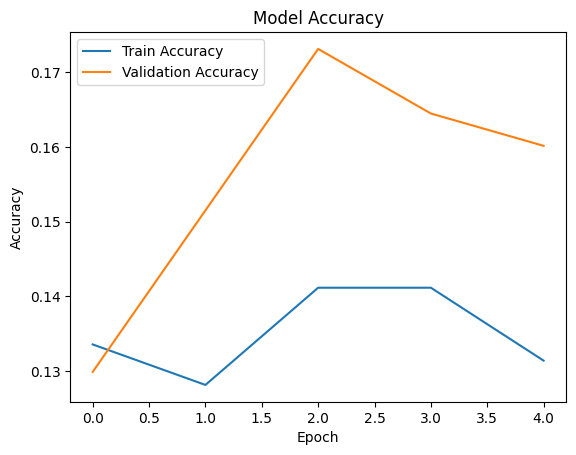

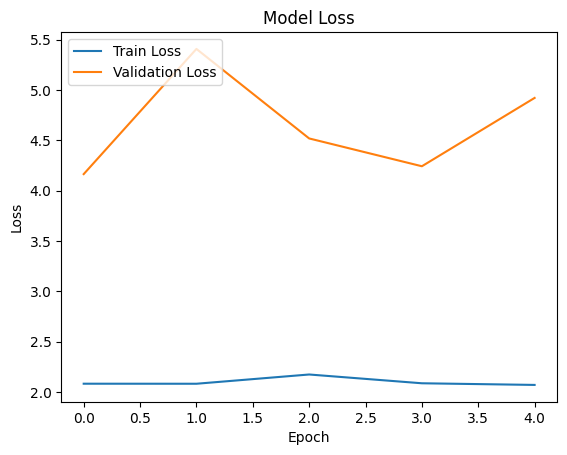

In [190]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


In [191]:
model.save('final_model.keras')  # Save in the .keras format


In [192]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `y_train` is the target variable containing class labels
sns.countplot(x=y_train)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()



ValueError: Per-column arrays must each be 1-dimensional

In [193]:
print(y_train.shape)


(1152, 8)


In [194]:
y_train = y_train.flatten()


In [196]:
import pandas as pd

y_train = pd.Series(y_train)


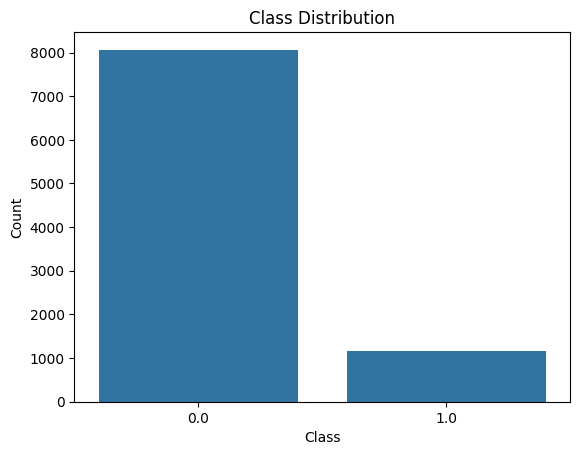

In [197]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=y_train)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


In [198]:
# Assuming y_train is your target variable
class_counts = y_train.value_counts()
print(class_counts)


0.0    8064
1.0    1152
Name: count, dtype: int64


In [199]:
# Calculate the imbalance ratio between the smallest and largest class sizes
imbalance_ratio = class_counts.max() / class_counts.min()
print(f'Imbalance Ratio: {imbalance_ratio}')


Imbalance Ratio: 7.0


In [203]:
# Check the shape of X_train
print("Original X_train shape:", X_train.shape)

# Step 1: Flatten the last three dimensions (timesteps, features, channels)
num_samples = X_train.shape[0]  # This should be 1152
X_train_flat = X_train.reshape(num_samples, -1)  # Flattening all dimensions except for the samples

print("Flattened X_train shape:", X_train_flat.shape)

# Step 2: Apply SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_flat, y_train)

# Step 3: Check if the reshaped data has consistent dimensions
print("Resampled X_train shape:", X_train_resampled.shape)
print("Resampled y_train shape:", y_train_resampled.shape)

# Step 4: If needed, reshape back to the original shape (timesteps, features, channels)
X_train_resampled = X_train_resampled.reshape(X_train_resampled.shape[0], X_train.shape[1], X_train.shape[2], X_train.shape[3])

# Check the new class distribution
print(pd.Series(y_train_resampled).value_counts())


Original X_train shape: (1152, 40, 385, 1)
Flattened X_train shape: (1152, 15400)


ValueError: Found input variables with inconsistent numbers of samples: [1152, 9216]

In [204]:
# Check the shape of y_train
print("Shape of y_train:", y_train.shape)



Shape of y_train: (9216,)


In [205]:
# Ensure y_train has the correct number of samples (1152)
y_train = y_train[:1152]


In [206]:
# Check the shape of y_train
print("Shape of y_train:", y_train.shape)



Shape of y_train: (1152,)


In [207]:
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Resample the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_flat, y_train)

# Check the shapes of the resampled data
print("Resampled X_train shape:", X_train_resampled.shape)
print("Resampled y_train shape:", y_train_resampled.shape)


Resampled X_train shape: (2016, 15400)
Resampled y_train shape: (2016,)


In [208]:
# Reshape back to the original shape: (num_samples, timesteps, features, 1)
X_train_resampled = X_train_resampled.reshape(X_train_resampled.shape[0], X_train.shape[1], X_train.shape[2], X_train.shape[3])

# Verify the reshaped data
print("Reshaped X_train_resampled shape:", X_train_resampled.shape)


Reshaped X_train_resampled shape: (2016, 40, 385, 1)


In [209]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model
model = Sequential()

# Convolutional layer + MaxPooling
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(40, 385, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten and Dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output layer (assuming binary classification; change units and activation for multi-class)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [210]:
# Train the model
history = model.fit(
    X_train_resampled,  # Resampled training data
    y_train_resampled,  # Resampled labels
    epochs=10,          # Number of epochs
    batch_size=32,      # Batch size
    validation_split=0.2,  # Validation split (20%)
    verbose=1           # Display training progress
)


Epoch 1/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 11s 186ms/step - accuracy: 0.6267 - loss: 0.6558 - val_accuracy: 0.0124 - val_loss: 0.8493
Epoch 2/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 9s 178ms/step - accuracy: 0.6999 - loss: 0.5695 - val_accuracy: 0.9084 - val_loss: 0.4673
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 9s 180ms/step - accuracy: 0.7816 - loss: 0.4742 - val_accuracy: 0.8094 - val_loss: 0.5188
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 9s 182ms/step - accuracy: 0.8589 - loss: 0.3476 - val_accuracy: 0.9777 - val_loss: 0.2183
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 9s 182ms/step - accuracy: 0.8898 - loss: 0.2839 - val_accuracy: 0.9554 - val_loss: 0.2373
Epoch 6/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 9s 179ms/step - accuracy: 0.9075 - loss: 0.2503 - val_accuracy: 0.8936 - val_loss: 0.3037
Epoch 7/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 9s 183ms/step - accuracy: 0.9515 - loss: 0.1605 - val_accuracy: 0.9604 - val_loss: 0.1845
Epoch 8/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 9s 182ms/step - accuracy: 0.9479 - loss: 0.1328 - val_accuracy: 1

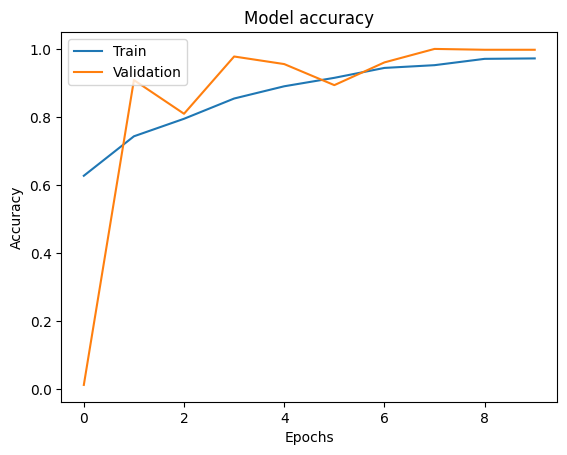

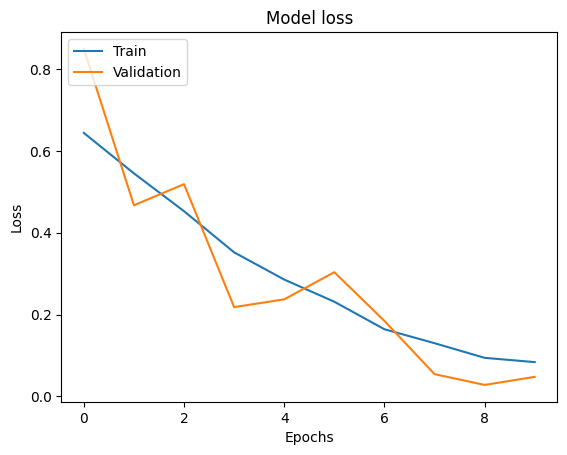

In [211]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [212]:
# Assuming X_test and y_test are your test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.1665 - loss: 1.9738
Test Accuracy: 17.19%


In [213]:
# Train the model with a higher number of epochs
history = model.fit(
    X_train_resampled,  # Resampled training data
    y_train_resampled,  # Resampled labels
    epochs=50,          # Higher number of epochs (e.g., 50)
    batch_size=32,      # Batch size
    validation_split=0.2,  # Validation split (20%)
    verbose=1           # Display training progress
)


Epoch 1/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 9s 184ms/step - accuracy: 0.9798 - loss: 0.0631 - val_accuracy: 1.0000 - val_loss: 0.0113
Epoch 2/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 10s 190ms/step - accuracy: 0.9887 - loss: 0.0358 - val_accuracy: 1.0000 - val_loss: 0.0178
Epoch 3/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 9s 183ms/step - accuracy: 0.9912 - loss: 0.0298 - val_accuracy: 1.0000 - val_loss: 0.0068
Epoch 4/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 9s 180ms/step - accuracy: 0.9924 - loss: 0.0294 - val_accuracy: 1.0000 - val_loss: 0.0061
Epoch 5/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 9s 182ms/step - accuracy: 0.9978 - loss: 0.0133 - val_accuracy: 1.0000 - val_loss: 0.0057
Epoch 6/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 9s 178ms/step - accuracy: 0.9969 - loss: 0.0191 - val_accuracy: 1.0000 - val_loss: 0.0037
Epoch 7/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 10s 188ms/step - accuracy: 0.9998 - loss: 0.0105 - val_accuracy: 1.0000 - val_loss: 0.0022
Epoch 8/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 9s 181ms/step - accuracy: 0.9990 - loss: 0.0119 - val_accuracy: 

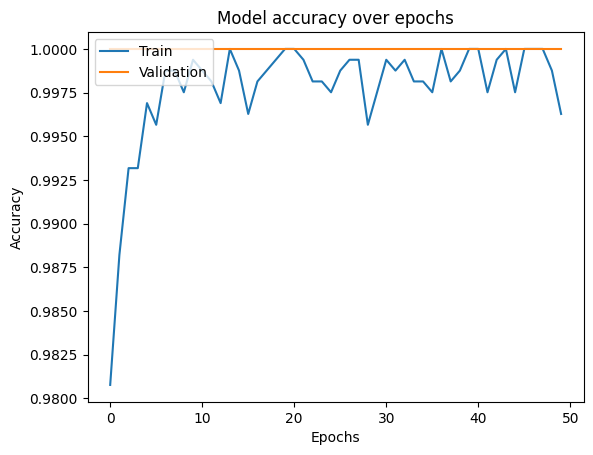

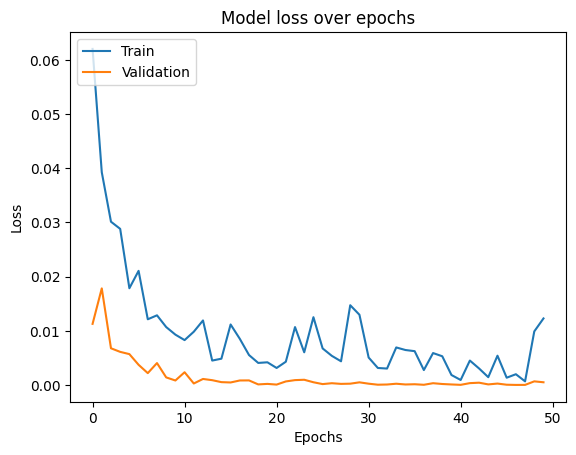

In [214]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [215]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.1969 - loss: 2.8607
Test Accuracy: 20.31%


In [216]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled.reshape(-1, X_train_resampled.shape[-1])).reshape(X_train_resampled.shape)
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)


In [217]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled.reshape(-1, X_train_resampled.shape[-1])).reshape(X_train_resampled.shape)
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)


In [219]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets (e.g., 80% training, 20% validation)
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)

# Now use X_train_split, y_train_split, X_val_split, y_val_split in your model training


In [220]:
model.fit(X_train_split, y_train_split, epochs=50, batch_size=32, validation_data=(X_val_split, y_val_split), callbacks=[lr_scheduler])


Epoch 1/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 9s 184ms/step - accuracy: 0.8843 - loss: 1.1219 - val_accuracy: 0.9926 - val_loss: 0.0298 - learning_rate: 0.0010
Epoch 2/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 9s 180ms/step - accuracy: 0.9860 - loss: 0.0358 - val_accuracy: 1.0000 - val_loss: 0.0034 - learning_rate: 0.0010
Epoch 3/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 9s 178ms/step - accuracy: 0.9945 - loss: 0.0188 - val_accuracy: 1.0000 - val_loss: 0.0020 - learning_rate: 0.0010
Epoch 4/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 9s 179ms/step - accuracy: 0.9919 - loss: 0.0146 - val_accuracy: 1.0000 - val_loss: 0.0021 - learning_rate: 0.0010
Epoch 5/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 10s 193ms/step - accuracy: 0.9983 - loss: 0.0080 - val_accuracy: 1.0000 - val_loss: 7.2983e-04 - learning_rate: 0.0010
Epoch 6/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 9s 185ms/step - accuracy: 1.0000 - loss: 0.0030 - val_accuracy: 1.0000 - val_loss: 9.6959e-04 - learning_rate: 0.0010
Epoch 7/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 9s 183ms/step - accuracy: 0.9976 - loss: 

In [221]:
optimizer = Adam(learning_rate=0.0001)  # Try adjusting learning rate
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [223]:
y_pred_classes = np.argmax(y_pred, axis=1)


In [224]:
y_test_classes = np.argmax(y_test, axis=1)


In [225]:
print(classification_report(y_test_classes, y_pred_classes))


              precision    recall  f1-score   support

           0       0.07      1.00      0.13        20
           1       0.00      0.00      0.00        44
           2       0.00      0.00      0.00        34
           3       0.00      0.00      0.00        39
           4       0.00      0.00      0.00        42
           5       0.00      0.00      0.00        32
           6       0.00      0.00      0.00        32
           7       0.00      0.00      0.00        45

    accuracy                           0.07       288
   macro avg       0.01      0.12      0.02       288
weighted avg       0.00      0.07      0.01       288



In [226]:
from keras.layers import Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(40, 385, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(8, activation='softmax')
])


In [233]:
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

# One-hot encode the labels
y_train_one_hot = to_categorical(y_train, num_classes=8)
y_test_one_hot = to_categorical(y_test, num_classes=8)

# Reshape the input data for the model
X_train_flat = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
X_test_flat = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])

# Normalize the data using StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train_flat)

# Transform the test data
X_test_scaled = scaler.transform(X_test_flat)

# Reshape the data back to 4D for CNN input
X_train_scaled = X_train_scaled.reshape(X_train_scaled.shape[0], 40, 385, 1)
X_test_scaled = X_test_scaled.reshape(X_test_scaled.shape[0], 40, 385, 1)

# Build the model if it hasn't been built yet (important for TensorFlow)
model.build(input_shape=(None, 40, 385, 1))

# Compile the model before fitting
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Now, train the model with one-hot encoded labels
model.fit(X_train_scaled, y_train_one_hot, epochs=20, batch_size=64, validation_split=0.2)


Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 216ms/step - accuracy: 0.6443 - loss: 6.0108 - val_accuracy: 0.8745 - val_loss: 3.5461
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 212ms/step - accuracy: 0.7981 - loss: 2.7562 - val_accuracy: 0.8745 - val_loss: 1.1603
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 223ms/step - accuracy: 0.8124 - loss: 1.0395 - val_accuracy: 0.8745 - val_loss: 0.5698
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 212ms/step - accuracy: 0.8691 - loss: 0.4409 - val_accuracy: 0.8745 - val_loss: 0.4057
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 207ms/step - accuracy: 0.8797 - loss: 0.3555 - val_accuracy: 0.8745 - val_loss: 0.3965
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 206ms/step - accuracy: 0.8848 - loss: 0.3111 - val_accuracy: 0.8745 - val_loss: 0.4124
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 206ms/step - accuracy: 0.8926 - loss: 0.2898 - val_accuracy: 0.8745 - val_loss: 0.4271
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 207ms/step - accuracy: 0.8880 - loss: 0.2664 - val_accuracy: 0.

In [235]:
import numpy as np
from sklearn.metrics import classification_report

# Get predictions
y_pred = model.predict(X_test_scaled)

# Convert the continuous predictions (probabilities) to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# If y_test is one-hot encoded, convert it to label format as well
y_test_labels = np.argmax(y_test_one_hot, axis=1)

# Print the classification report
print(classification_report(y_test_labels, y_pred_labels))


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


ValueError: Classification metrics can't handle a mix of multiclass-multioutput and binary targets

In [236]:

# Check the unique values in y_test_labels and y_pred_labels
print("Unique values in y_test_labels:", np.unique(y_test_labels))
print("Unique values in y_pred_labels:", np.unique(y_pred_labels))

# Ensure that both are in the same format, here assuming it's multiclass
# If y_test_labels is not in the same shape as y_pred_labels, 
# you may need to process it to match.



Unique values in y_test_labels: [0 1 2 3 4 5 6 7]
Unique values in y_pred_labels: [0]


In [237]:
# Ensure the output layer is set up correctly for multiclass classification
model.add(Dense(8, activation='softmax'))  # 8 classes for multiclass classification


In [238]:
# Compile the model with categorical crossentropy for multiclass classification
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [242]:
from tensorflow.keras.utils import to_categorical

# Assuming y_train and y_test are the label arrays
y_train_one_hot = to_categorical(y_train, num_classes=8)
y_test_one_hot = to_categorical(y_test, num_classes=8)


In [247]:
# Convert y_test_labels from one-hot encoding to class indices (if it's one-hot encoded)
y_test_labels = np.argmax(y_test_labels, axis=1)

# Check the shape and unique values of y_test_labels again
print(f"y_test_labels shape after conversion: {y_test_labels.shape}")
print(f"Unique values in y_test_labels after conversion: {np.unique(y_test_labels)}")

# Ensure that y_pred_labels are also 1D class indices
# Now print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_labels, y_pred_labels))


y_test_labels shape after conversion: (288,)
Unique values in y_test_labels after conversion: [0 1]
              precision    recall  f1-score   support

           0       0.07      1.00      0.13        20
           1       0.00      0.00      0.00       268

    accuracy                           0.07       288
   macro avg       0.03      0.50      0.06       288
weighted avg       0.00      0.07      0.01       288



In [249]:
from keras.utils import to_categorical

y_train_one_hot = to_categorical(y_train, num_classes=8)


In [250]:
from keras.utils import to_categorical

# Convert y_train to one-hot encoding
y_train_one_hot = to_categorical(y_train, num_classes=8)

class_weight = {0: 1, 1: 10}  # Adjust the weights for each class

# Train the model with the updated labels and class weights
model.fit(X_train, y_train_one_hot, class_weight=class_weight)


36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 133ms/step - accuracy: 0.8796 - loss: 3.2073


In [251]:
# Predict on the test set
y_pred = model.predict(X_test)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [252]:
y_pred_labels = np.argmax(y_pred, axis=1)  # If your model outputs probabilities (e.g., softmax)


In [253]:
from sklearn.metrics import classification_report

# Assuming y_test_labels is your ground truth (test labels)
print(classification_report(y_test_labels, y_pred_labels))


              precision    recall  f1-score   support

           0       0.07      1.00      0.13        20
           1       0.00      0.00      0.00       268

    accuracy                           0.07       288
   macro avg       0.03      0.50      0.06       288
weighted avg       0.00      0.07      0.01       288



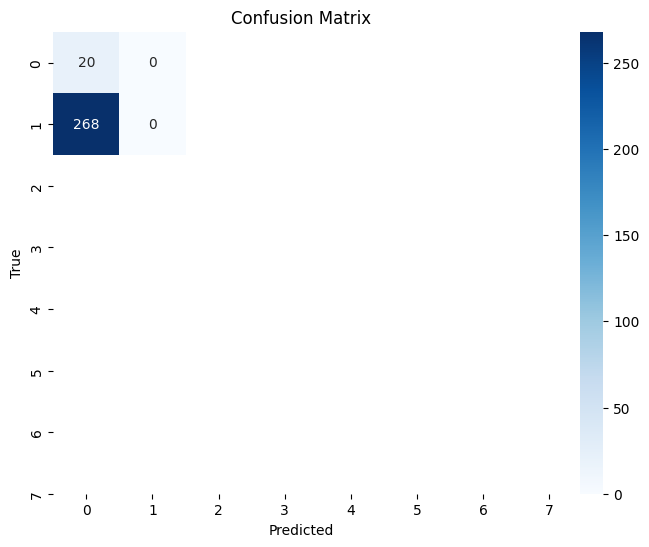

In [254]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_labels, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[str(i) for i in range(8)], yticklabels=[str(i) for i in range(8)])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [255]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.0712 - loss: 2.2907
Test Accuracy: 6.94%


In [256]:
df=pd.read_csv(processed_data_path)
df.shape

(1440, 14)

In [257]:
df=df.fillna(0)
print(df.isna().any())
df.shape


0          False
1          False
2          False
3          False
4          False
5          False
6          False
7          False
8          False
9          False
10         False
11         False
12         False
Emotion    False
dtype: bool


(1440, 14)

In [258]:
df.head(10)


0          1         2          3         4          5         6  \
0 -726.21720  68.541420  3.293398  12.205300  5.510278  13.667408 -2.983828   
1 -719.12830  70.201570  1.168397  13.122543  7.836950  14.411290 -4.111360   
2 -714.99570  69.689350  3.924564  11.924190  6.421723  11.011614 -2.878103   
3 -710.97530  67.564880  5.782241  13.230726  6.190845  12.628252 -1.675169   
4 -759.92175  75.783520  6.023605  14.557394  6.454188  14.631508 -3.004551   
5 -735.00660  79.093050  8.141051  11.413549  5.174124  15.393283 -2.752072   
6 -733.52490  81.589860  4.863358  14.423686  5.267689  13.968560 -3.085616   
7 -728.36300  82.324936  7.500577  12.542465  6.788125  14.805659 -2.909580   
8 -771.62524  83.327550  9.759607  14.268048  6.201727  16.020977 -2.846898   
9 -733.98960  82.991570  3.796793  13.411559  3.108496  16.039553 -5.652945   

          7         8         9        10        11        12  Emotion  
0  3.098029 -3.310813 -1.564384 -7.861652 -2.124282  2.849204        1  
1  4.468973 -3.539367 -3.658608 -7.648504 -1.477078  3.031821        1  
2  4.509558 -4.476109 -2.671549 -7.499284 -2.962265  1.873485        1  
3  5.657494 -4.950634 -3.477545 -7.416558 -1.937004  2.271525        1  
4  4.620970 -5.200016 -0.707430 -7.790287 -3.564949  2.180970        2  
5  2.964584 -5.388972 -1.691832 -5.852835 -4.043288  3.004641        2  
6  7.173245 -4.821439 -0.967449 -6.250474 -3.866640  3.325519        2  
7  6.937839 -4.844340 -1.846923 -5.687710 -3.666654  2.240351        2  
8  4.470250 -5.536262  0.878795 -5.348249 -3.029556  2.340573        2  
9  5.560671 -7.840987 -1.177210 -5.728787 -4.109694  3.882382        2

In [259]:
X=df.drop(labels='Emotion',axis=1)
Y=df['Emotion']

In [261]:
from keras.utils import to_categorical
lb = LabelEncoder()
Y = to_categorical(lb.fit_transform(Y))
print(lb.classes_)
print(Y)


[1 2 3 4 5 6 7 8]
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [262]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=42,test_size=0.2,shuffle=True)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1152, 13), (288, 13), (1152, 8), (288, 8))

In [263]:
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,random_state=42,test_size=0.1,shuffle=True)
X_train.shape, X_test.shape, X_val.shape, y_train.shape,y_test.shape,y_val.shape

((1036, 13), (288, 13), (116, 13), (1036, 8), (288, 8), (116, 8))

In [264]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_val=scaler.transform(X_val)
X_train.shape,X_test.shape,X_val.shape,y_train.shape,y_test.shape,y_val.shape

((1036, 13), (288, 13), (116, 13), (1036, 8), (288, 8), (116, 8))

In [265]:
X_train=np.expand_dims(X_train,axis=2)
X_val=np.expand_dims(X_val,axis=2)
X_test=np.expand_dims(X_test,axis=2)
X_train.shape, X_test.shape, X_val.shape

((1036, 13, 1), (288, 13, 1), (116, 13, 1))

In [266]:
early_stop=EarlyStopping(monitor='val_acc',mode='auto',patience=5,restore_best_weights=True)
lr_reduction=ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.5,min_lr=0.00001)

In [267]:
EPOCH=50
BATCH_SIZE=64

In [271]:
model = tf.keras.Sequential([
    L.Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(X_train.shape[1], 1)),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5, strides=2, padding='same'),
    L.Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5, strides=2, padding='same'),
    L.Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5, strides=2, padding='same'),
    L.Conv1D(256, kernel_size=3, strides=1, padding='same', activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5, strides=2, padding='same'),
    L.Conv1D(128, kernel_size=3, strides=1, padding='same', activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=3, strides=2, padding='same'),
    L.Flatten(),
    L.Dense(512, activation='relu'),
    L.BatchNormalization(),
    L.Dense(8, activation='softmax')  # Change 7 to 8 here to match your labels
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [272]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_10 (Conv1D)                   │ (None, 13, 512)             │           3,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_33               │ (None, 13, 512)             │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_10 (MaxPooling1D)      │ (None, 7, 512)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_11 (Conv1D)                   │ (None, 7, 512)              │       1,311,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_34               │ (None, 7, 512)              │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_11 (MaxPooling1D)      │ (None, 4, 512)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_12 (Conv1D)                   │ (None, 4, 256)              │         655,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_35               │ (None, 4, 256)              │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_12 (MaxPooling1D)      │ (None, 2, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_13 (Conv1D)                   │ (None, 2, 256)              │         196,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_36               │ (None, 2, 256)              │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_13 (MaxPooling1D)      │ (None, 1, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_14 (Conv1D)                   │ (None, 1, 128)              │          98,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_37               │ (None, 1, 128)              │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_14 (MaxPooling1D)      │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_16 (Flatten)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 512)                 │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_38               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 2,344,072 (8.94 MB)

 Trainable params: 2,339,720 (8.93 MB)

 Non-trainable params: 4,352 (17.00 KB)

In [275]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, mode='max', verbose=1)


In [276]:
history = model.fit(X_train, y_train, epochs=EPOCH, validation_data=(X_val, y_val), batch_size=BATCH_SIZE, callbacks=[early_stop, lr_reduction])


Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.4105 - loss: 1.5381 - val_accuracy: 0.1034 - val_loss: 2.1272 - learning_rate: 0.0010
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - accuracy: 0.4505 - loss: 1.4689 - val_accuracy: 0.1379 - val_loss: 2.1126 - learning_rate: 0.0010
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.5349 - loss: 1.2844 - val_accuracy: 0.1034 - val_loss: 2.1522 - learning_rate: 0.0010
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.5449 - loss: 1.2521 - val_accuracy: 0.1293 - val_loss: 2.1242 - learning_rate: 0.0010
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.5244 - loss: 1.1790 - val_accuracy: 0.1810 - val_loss: 2.2576 - learning_rate: 0.0010
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.5891 - loss: 1.1304 - val_accuracy: 0.1121 - val_loss: 2.4131 - learning_rate: 0.0010
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - accuracy: 0.6184 - loss: 1.0834 - val_acc

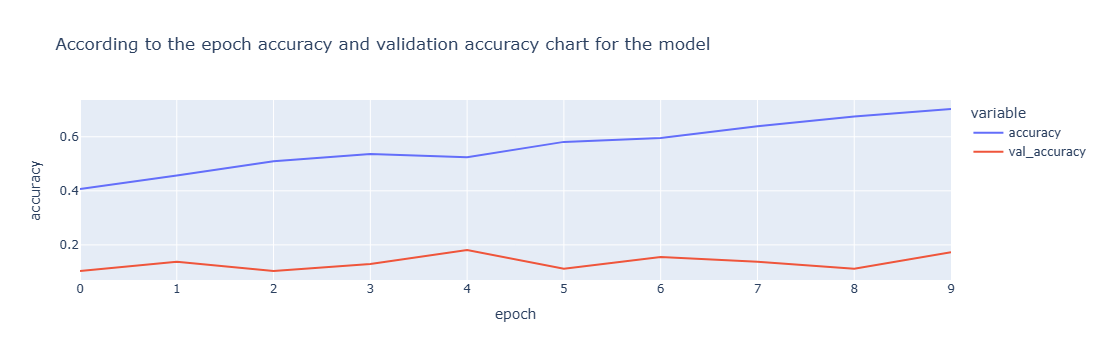

In [277]:
fig=px.line(history.history,y=['accuracy','val_accuracy'],
           labels={'index':'epoch','value':'accuracy'},
           title=f'According to the epoch accuracy and validation accuracy chart for the model')
fig.show()

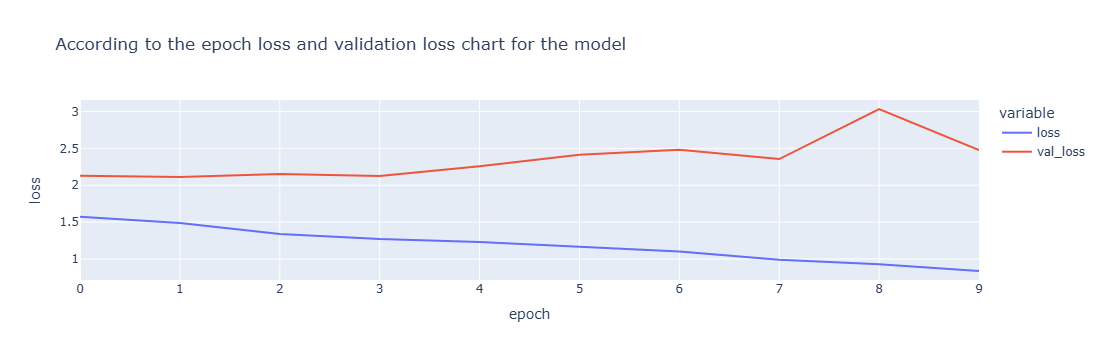

In [278]:
fig=px.line(history.history,y=['loss','val_loss'],
           labels={'index':'epoch','value':'loss'},
           title=f'According to the epoch loss and validation loss chart for the model')
fig.show()



In [279]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([7, 1, 2, 7, 2, 2, 3, 2, 3, 1, 2, 3, 2, 2, 7, 7, 7, 2, 2, 2, 3, 3,
       3, 1, 2, 3, 7, 7, 3, 7, 7, 2, 7, 2, 1, 2, 3, 7, 2, 3, 2, 1, 1, 7,
       7, 7, 3, 1, 7, 2, 2, 7, 7, 7, 3, 7, 1, 3, 7, 7, 1, 3, 7, 7, 2, 3,
       7, 7, 3, 2, 7, 3, 3, 2, 7, 1, 7, 7, 1, 2, 7, 2, 3, 1, 3, 7, 2, 3,
       7, 1, 7, 3, 3, 2, 2, 7, 7, 7, 3, 7, 7, 2, 2, 3, 2, 7, 3, 7, 7, 3,
       2, 7, 7, 1, 3, 3, 2, 7, 7, 2, 3, 7, 3, 2, 2, 7, 3, 2, 2, 7, 2, 7,
       1, 2, 3, 2, 3, 1, 3, 3, 7, 7, 2, 7, 2, 2, 7, 1, 2, 2, 2, 2, 3, 2,
       2, 1, 7, 1, 1, 3, 2, 7, 7, 7, 3, 3, 7, 3, 3, 7, 3, 2, 2, 2, 7, 3,
       7, 7, 7, 3, 7, 2, 3, 7, 3, 3, 3, 2, 7, 7, 1, 3, 7, 3, 3, 7, 7, 3,
       3, 3, 2, 1, 7, 3, 2, 7, 3, 3, 7, 7, 7, 2, 3, 2, 1, 3, 3, 7, 2, 7,
       3, 2, 3, 3, 3, 3, 1, 3, 7, 7, 3, 3, 7, 7, 3, 7, 3, 2, 2, 3, 2, 3,
       3, 1, 7, 7, 7, 2, 7, 3, 7, 1, 7, 1, 7, 3, 2, 7, 3, 1, 2, 7, 3, 7,
       7, 2, 3, 3, 2, 1, 2, 1, 2, 2, 3, 7, 2, 3, 2, 7, 7, 2, 3, 3, 1, 3,
       2, 3], dtype=int64)

In [280]:
y_check=np.argmax(y_test,axis=1)
y_check

array([6, 1, 1, 1, 4, 1, 1, 5, 7, 1, 6, 7, 3, 5, 3, 6, 4, 5, 1, 6, 7, 0,
       0, 3, 5, 3, 7, 7, 6, 4, 7, 4, 2, 5, 7, 1, 6, 4, 2, 4, 1, 0, 1, 4,
       7, 1, 1, 0, 5, 3, 3, 7, 7, 4, 0, 1, 1, 7, 2, 0, 7, 5, 7, 7, 5, 2,
       1, 6, 6, 3, 2, 7, 1, 2, 7, 1, 4, 7, 3, 6, 2, 2, 7, 1, 2, 4, 5, 1,
       2, 1, 0, 1, 4, 4, 0, 6, 7, 2, 2, 7, 6, 5, 4, 5, 3, 7, 2, 6, 5, 0,
       7, 4, 7, 1, 6, 4, 5, 6, 6, 5, 6, 1, 7, 5, 3, 4, 7, 2, 5, 5, 2, 2,
       3, 5, 2, 3, 1, 1, 6, 6, 4, 4, 2, 2, 4, 2, 4, 1, 7, 5, 5, 3, 1, 5,
       2, 0, 5, 3, 7, 5, 3, 4, 4, 3, 2, 0, 4, 1, 3, 7, 1, 5, 4, 6, 5, 1,
       4, 7, 2, 3, 2, 5, 2, 3, 0, 0, 7, 4, 4, 3, 6, 5, 3, 1, 3, 5, 7, 7,
       6, 1, 5, 3, 7, 3, 1, 4, 6, 3, 2, 7, 2, 6, 7, 5, 0, 5, 4, 4, 7, 7,
       3, 7, 6, 5, 3, 6, 1, 3, 3, 0, 3, 7, 3, 6, 7, 4, 4, 6, 4, 0, 6, 1,
       7, 0, 2, 2, 0, 1, 1, 3, 4, 3, 4, 1, 4, 6, 3, 7, 1, 1, 4, 1, 1, 1,
       4, 0, 6, 7, 7, 1, 2, 0, 3, 7, 3, 4, 4, 2, 4, 2, 4, 2, 3, 6, 3, 6,
       2, 3], dtype=int64)

In [281]:
loss,accuracy=model.evaluate(X_test,y_test,verbose=0)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

Test Loss: 2.294886589050293
Test Accuracy: 0.2083333283662796


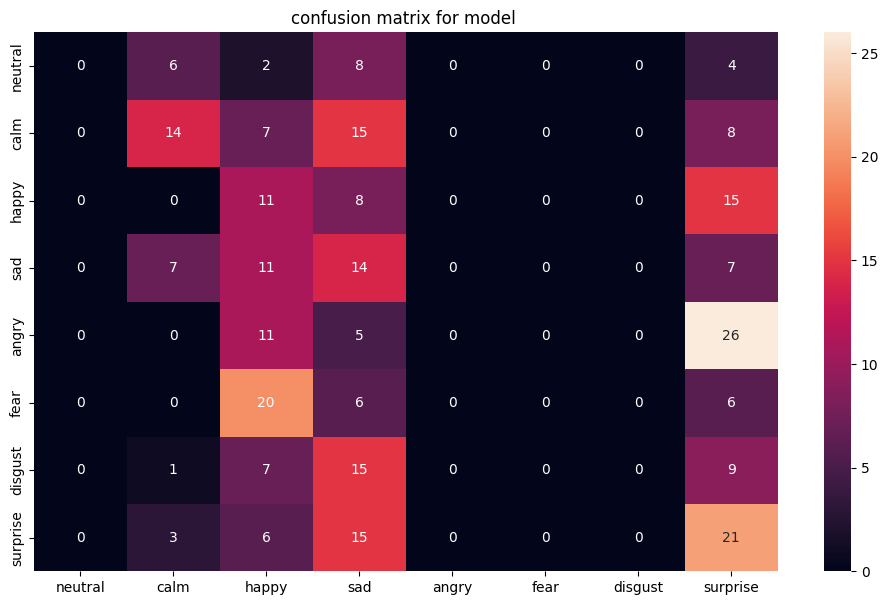

In [282]:
conf=confusion_matrix(y_check,y_pred)
cm=pd.DataFrame(
    conf,index=[i for i in emotion_names],
    columns=[i for i in emotion_names]
)
plt.figure(figsize=(12,7))
ax=sns.heatmap(cm,annot=True,fmt='d')
ax.set_title(f'confusion matrix for model ')
plt.show()


In [283]:
print(f'Model Confusion Matrix\n',classification_report(y_check,y_pred,target_names=emotion_names))

Model Confusion Matrix
               precision    recall  f1-score   support

     neutral       0.00      0.00      0.00        20
        calm       0.45      0.32      0.37        44
       happy       0.15      0.32      0.20        34
         sad       0.16      0.36      0.22        39
       angry       0.00      0.00      0.00        42
        fear       0.00      0.00      0.00        32
     disgust       0.00      0.00      0.00        32
    surprise       0.22      0.47      0.30        45

    accuracy                           0.21       288
   macro avg       0.12      0.18      0.14       288
weighted avg       0.14      0.21      0.16       288



In [286]:
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.5,  # Instead of reducing too much, try a smaller factor
    patience=5,  # More patience before reducing the learning rate
    min_lr=1e-6  # Lower bound for the learning rate
)


In [288]:
from tensorflow.keras import regularizers

model = tf.keras.Sequential([
    L.Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu', 
             input_shape=(X_train.shape[1], 1), kernel_regularizer=regularizers.l2(0.01)),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5, strides=2, padding='same'),
    L.Dropout(0.5),  # Adding dropout after Conv layers
    # Continue with other layers
])


In [295]:
model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_36 (Conv2D)                   │ (None, 40, 385, 32)         │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_36 (MaxPooling2D)      │ (None, 20, 193, 32)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_19 (Flatten)                 │ (None, 123520)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 128)                 │      15,810,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 8)                   │           1,032 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,812,040 (60.32 MB)

 Trainable params: 15,812,040 (60.32 MB)

 Non-trainable params: 0 (0.00 B)